<a href="https://colab.research.google.com/github/omniscientHorizon/GreekLife-SentimentAnalysis/blob/main/Copy_of_KA_Copy_of_206_Final_Project_KSHITIJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Greek Life at Union College: A Century of Change
by Kshitij Agarwal


__________________________________________________________________________________________
##Introduction
__________________________________________________________________________________________

The Concordiensis Dataset is a repository of text files extracted from the archives of Union College's Concordiensis newspaper, spanning the years 1880 to 2000. This dataset provides a unique opportunity to explore over a century of student perspectives, campus events, and social trends. However, the data is 'messy,' as it was generated using Optical Character Recognition (OCR), leading to frequent misspellings, character anomalies, and noise.

For this project, I aim to analyze Greek Life on campus, a prominent aspect of Union College's social and organizational culture. My focus is on understanding how fraternities, sororities, and Greek Life as a broader entity have been perceived over time. Specifically, I will:

- Analyze sentiment trends related to Greek Life, identifying how student attitudes have evolved.
- Examine individual fraternities and sororities, uncovering unique patterns or perceptions tied to specific organizations.
- Explore the language used in connection with Greek Life, including adjectives and commonly associated terms, to identify shifting themes and narratives.

Through this analysis, I aim to answer several key questions:

* How has the sentiment towards Greek Life changed across the decades?
* Are fraternities and sororities perceived differently, and if so, how?
* What adjectives and themes are most frequently associated with Greek organizations, and how do they shift over time?
* What insights can we gather from spikes or dips in sentiment during specific periods?

My methodology involves applying Natural Language Processing (NLP) techniques, including sentiment analysis, word cloud generation, and adjective trend analysis. By examining broader terms like "Greek Life", "Fraternity" and "Sorority" alongside specific fraternity and sorority names, I aim to uncover both general patterns and organization-specific trends.

In addition to sentiment analysis, I will use part-of-speech tagging to identify adjectives that describe Greek Life. These descriptors should shed valuable insight into how students have characterized these organizations over the decades, offering a deeper understanding of evolving narratives. Word clouds will visually represent the most frequently used terms, while sentiment graphs will track positive and negative perceptions over time.

Ultimately, this project aims to tell a story about the perception of Greek Life at Union College, drawing on over a century of data to uncover the changing perceptions, language, and sentiment associated with these organizations. By analyzing the data, I hope to provide meaningful insights into how Greek Life has influenced campus culture and how its perception has evolved in response to social, cultural, and institutional changes.

__________________________________________________________________________________________
##Data Processing
__________________________________________________________________________________________

The Concordiensis dataset, spanning over 120 years, required a structured and iterative approach to process and extract meaningful information. Below are the detailed steps I undertook to clean, organize, and analyze the data:

###Imports and set up

To process and analyze the dataset effectively, several libraries and tools were imported.


In [ ]:
#imports:
import pickle
from google.colab import drive
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import ssl
import urllib
from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import string

We will download several NLTK resources, such as the VADER lexicon, stopwords, and part-of-speech taggers, to enable accurate text analysis.

In [ ]:
nltk.download('punkt_tab')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
ssl._create_default_https_context = ssl._create_unverified_context
sia = SentimentIntensityAnalyzer()
stop_words = stopwords.words('english')

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Testing my plans and ideas with a smaller data set

Before processing the entire Concordiensis dataset, I tested my code and methodologies on smaller subsets of data to ensure efficiency, accuracy, and scalability. This iterative approach allowed me to refine my functions and logic before applying them to the complete dataset.

This small-scale testing phase served as a proof of concept for my methodology and provided confidence in scaling up to the full dataset. Once the results were satisfactory, I applied the same logic to the entire dataset to uncover broader trends and insights.

This section of the code has now been commented out to streamline the final implementation and focus on the complete dataset analysis.

In [ ]:
#starting small
#for this one i want to get the occurences of the word fraternity in the text of year 1880

# fileName = "https://cs.union.edu/~webbn/Concordy/concordy-master-Text/Text/1880-01.txt"

# try:
#   (urlopen(fileName))
# except HTTPError as e:
#   print('Error code: ', e.code)
# except URLError as e:
#   print('Reason: ', e.reason)
# else:
#   response = urllib.request.urlopen(fileName)
#   data = response.read()
#   text = data.decode('utf-8')

# text = text.lower()

# print(text[:500])


In [ ]:
# #extract greek life related terms:

# greek_life_terms = ['fraternity', 'sorority', 'greek life']
# fraternity_terms = ['alpha delta phi', 'sigma phi', 'chi psi', 'kappa alpha', 'sigma chi', 'theta delta chi']
# sorority_terms = ['delta phi epsilon', 'gamma phi beta', 'sigma delta tau']

# def extract_relevant_sentences(text, terms):
#     sentences = nltk.sent_tokenize(text.lower())  # Tokenize and standardize to lowercase
#     relevant_sentences = [sentence for sentence in sentences if any(term in sentence for term in terms)]
#     return relevant_sentences

# # Test with a single file
# relevant_sentences_greek_life = extract_relevant_sentences(text, greek_life_terms)
# relevant_sentences_fraternity = extract_relevant_sentences(text, fraternity_terms)
# relevant_sentences_sorority = extract_relevant_sentences(text, sorority_terms)

# # Print sample results with labels for clarity
# print("Greek Life Related Sentences:", relevant_sentences_greek_life[:5])
# print("Fraternity Related Sentences:", relevant_sentences_fraternity[:5])
# print("Sorority Related Sentences:", relevant_sentences_sorority[:5])


In [ ]:
# # Initialize VADER sentiment analyzer
# sia = SentimentIntensityAnalyzer()

# # Function to calculate sentiment percentages
# def calculate_sentiment_percentages(sentences):
#     positive = 0
#     negative = 0

#     for sentence in sentences:
#         sentiment_score = sia.polarity_scores(sentence)['compound']
#         if sentiment_score > 0.05:
#             positive += 1
#         elif sentiment_score < -0.05:
#             negative += 1

#     total = len(sentences)
#     positive_percentage = (positive / total) * 100 if total > 0 else 0
#     negative_percentage = (negative / total) * 100 if total > 0 else 0

#     return positive_percentage, negative_percentage

# sentiment_percentages = {
#     "Greek Life": calculate_sentiment_percentages(relevant_sentences_greek_life),
#     "Fraternity": calculate_sentiment_percentages(relevant_sentences_fraternity),
#     "Sorority": calculate_sentiment_percentages(relevant_sentences_sorority)
# }

# print("Sentiment Percentages:")
# for category, (positive_pct, negative_pct) in sentiment_percentages.items():
#     print(f"{category}: Positive = {positive_pct:.2f}%, Negative = {negative_pct:.2f}%")


In [ ]:
# #trying out the vector window thing:
# window_size = 3
# target_terms = greek_life_terms + fraternity_terms + sorority_terms

# def extract_windows(text, target_terms, window_size):
#     windows = []
#     sentences = nltk.sent_tokenize(text)

#     for sentence in sentences:
#         words = nltk.word_tokenize(sentence.lower())
#         for i, word in enumerate(words):
#             if word in target_terms:

#                 start = max(0, i - window_size)
#                 end = min(len(words), i + window_size + 1)
#                 window = words[start:end]
#                 windows.append(window)

#     return windows

# # Test with a single file's text
# windows_greek_life = extract_windows(text, greek_life_terms, window_size)
# print("Sample Windows for Greek Life Terms:", windows_greek_life[:5])

###Scaling up to the entire dataset
With the smaller dataset successfully tested and the methodology refined, I am now scaling the analysis to the entire Concordiensis dataset.


### Fetching and Compiling Yearly Text Data
The dataset consists of monthly text files for each issue of the Concordiensis. To organize this data, I iterated through all years from 1880 to 2000, fetching text for each month and also converted all text lowercase to ensure uniformity during keyword searches and analysis.

Monthly issues were combined into a single text blobs for each year, representing all content published that year. Several months were skipped every year due to summer and winter vacations, and a few years were skipped altogether, this was after WW2, owing to the country recuperating from its aftermath.

In [ ]:
#getting yearly text:

# folder = "https://cs.union.edu/~webbn/Concordy/concordy-master-Text/Text/"

# start_year = 1880
# end_year = 2000
# years = range(start_year, end_year+1)

# yearly_text = {}

# for year in years:
#   year_txt = ""

#   for month in range(1,13):
#     if month < 10:
#       monthStr = f"0{month}"
#     else:
#       monthStr = str(month)

#     path = f"{folder}{year}-{monthStr}.txt"
#     req = Request(path)

#     try:
#       response = urlopen(req)
#       data = response.read()
#       text = data.decode('utf-8')
#       year_txt += text
#     except (HTTPError, URLError):
#       pass

#   print(f"finished year{year}")
#   if len(year_txt) > 0:
#     yearly_text[year] = year_txt.lower()

To avoid redundant processing and save time, the yearly text data was serialized into a dictionary using Python's pickle library. This allowed for quick reloading of the dataset in subsequent steps.

In [ ]:
# pickling out the data
# location = '/content/drive/My Drive/Data/finalProject/yearlytext'
# pickle_out = open(location,'wb')
# pickle.dump(yearly_text,pickle_out)
# pickle_out.close()

In [ ]:
#unpickle yearly text dictionary data
#pickle_in = open('/content/drive/My Drive/Data/finalProject/yearlytext','rb')
pickle_in = open('/content/drive/My Drive/Data/finalProject/yearlytext','rb')
issues = pickle.load(pickle_in)
pickle_in.close()

In [ ]:
#verifying the data
all_strings = True
start_key = None
end_key = None
errors = []


for i, (key, value) in enumerate(issues.items()):
    if i == 0:
        start_key = key
    end_key = key

    if not isinstance(value, str):
        all_strings = False
        errors.append((key, type(value)))

if all_strings and start_key == 1880 and end_key == 2000:
  print('unpickling was succesful and validated')

unpickling was succesful and validated


###Extracting Relevant Sentences

To focus the analysis on Greek Life, I categorized keywords into three groups:
1. **Broad Terms:** General terms like "fraternity," "sorority," and "Greek Life."
2. **Specific Fraternities:** Names of prominent fraternities such as "Alpha Delta Phi" and "Sigma Phi."
3. **Specific Sororities:** Names of sororities such as "Delta Phi Epsilon" and "Gamma Phi Beta."

For each year, I tokenized the text into sentences and filtered those containing any of the keywords. Separate dictionaries were created to store relevant sentences for each category, and pickled out to save time.


In [ ]:
# greek_life_terms = ['fraternity', 'sorority', 'greek life']
# fraternity_terms = ['alpha delta phi', 'sigma phi', 'chi psi', 'kappa alpha', 'sigma chi', 'theta delta chi']
# sorority_terms = ['delta phi epsilon', 'gamma phi beta', 'sigma delta tau']

In [ ]:
# def extract_relevant_sentences_broader(text, terms):
#     sentences = nltk.sent_tokenize(text.lower())
#     relevant_sentences = [sentence for sentence in sentences if any(term in sentence for term in terms)]
#     return relevant_sentences

In [ ]:
# def extract_relevant_sentences_specific(text, term):
#     sentences = nltk.sent_tokenize(text.lower())
#     relevant_sentences = [sentence for sentence in sentences if term in sentence]
#     return relevant_sentences

In [ ]:
# # Broader terms
# greekLife_relevant_sentences_by_year = {}
# fraternity_relevant_sentences_by_year = {}
# sorority_relevant_sentences_by_year = {}

# # Specific fraternities
# adp_relevant_sentences_by_year = {}  # Alpha Delta Phi
# sigphi_relevant_sentences_by_year = {}  # Sigma Phi
# chipsi_relevant_sentences_by_year = {}  # Chi Psi
# kappaalpha_relevant_sentences_by_year = {}  # Kappa Alpha
# sigchi_relevant_sentences_by_year = {}  # Sigma Chi
# thetadeltachi_relevant_sentences_by_year = {}  # Theta Delta Chi

# # Specific sororities
# dphi_relevant_sentences_by_year = {}  # Delta Phi Epsilon
# gphi_relevant_sentences_by_year = {}  # Gamma Phi Beta
# sdt_relevant_sentences_by_year = {}  # Sigma Delta Tau

In [ ]:
# for year, text in issues.items():
#     # Populate broader terms
#     greekLife_relevant_sentences_by_year[year] = extract_relevant_sentences_broader(text, greek_life_terms)
#     fraternity_relevant_sentences_by_year[year] = extract_relevant_sentences_broader(text, fraternity_terms)
#     sorority_relevant_sentences_by_year[year] = extract_relevant_sentences_broader(text, sorority_terms)

#     # Populate specific fraternities
#     adp_relevant_sentences_by_year[year] = extract_relevant_sentences_specific(text, "alpha delta phi")
#     sigphi_relevant_sentences_by_year[year] = extract_relevant_sentences_specific(text, "sigma phi")
#     chipsi_relevant_sentences_by_year[year] = extract_relevant_sentences_specific(text, "chi psi")
#     kappaalpha_relevant_sentences_by_year[year] = extract_relevant_sentences_specific(text, "kappa alpha")
#     sigchi_relevant_sentences_by_year[year] = extract_relevant_sentences_specific(text, "sigma chi")
#     thetadeltachi_relevant_sentences_by_year[year] = extract_relevant_sentences_specific(text, "theta delta chi")

#     # Populate specific sororities
#     dphi_relevant_sentences_by_year[year] = extract_relevant_sentences_specific(text, "delta phi epsilon")
#     gphi_relevant_sentences_by_year[year] = extract_relevant_sentences_specific(text, "gamma phi beta")
#     sdt_relevant_sentences_by_year[year] = extract_relevant_sentences_specific(text, "sigma delta tau")

#     print(f"Finished processing year {year}")

pickling the relevant sentences out

In [ ]:
# # Save broader terms
# with open('/content/drive/My Drive/Data/finalProject/greekLife_sentences.pkl', 'wb') as f:
#     pickle.dump(greekLife_relevant_sentences_by_year, f)

# with open('/content/drive/My Drive/Data/finalProject/fraternity_sentences.pkl', 'wb') as f:
#     pickle.dump(fraternity_relevant_sentences_by_year, f)

# with open('/content/drive/My Drive/Data/finalProject/sorority_sentences.pkl', 'wb') as f:
#     pickle.dump(sorority_relevant_sentences_by_year, f)

# # Save specific fraternities
# with open('/content/drive/My Drive/Data/finalProject/adp_sentences.pkl', 'wb') as f:
#     pickle.dump(adp_relevant_sentences_by_year, f)

# with open('/content/drive/My Drive/Data/finalProject/sigphi_sentences.pkl', 'wb') as f:
#     pickle.dump(sigphi_relevant_sentences_by_year, f)

# with open('/content/drive/My Drive/Data/finalProject/chipsi_sentences.pkl', 'wb') as f:
#     pickle.dump(chipsi_relevant_sentences_by_year, f)

# with open('/content/drive/My Drive/Data/finalProject/kappaalpha_sentences.pkl', 'wb') as f:
#     pickle.dump(kappaalpha_relevant_sentences_by_year, f)

# with open('/content/drive/My Drive/Data/finalProject/sigchi_sentences.pkl', 'wb') as f:
#     pickle.dump(sigchi_relevant_sentences_by_year, f)

# with open('/content/drive/My Drive/Data/finalProject/thetadeltachi_sentences.pkl', 'wb') as f:
#     pickle.dump(thetadeltachi_relevant_sentences_by_year, f)

# # Save specific sororities
# with open('/content/drive/My Drive/Data/finalProject/deltaphiepsilon_sentences.pkl', 'wb') as f:
#     pickle.dump(dphi_relevant_sentences_by_year, f)

# with open('/content/drive/My Drive/Data/finalProject/gammaphibeta_sentences.pkl', 'wb') as f:
#     pickle.dump(gphi_relevant_sentences_by_year, f)

# with open('/content/drive/My Drive/Data/finalProject/sigdelatau_sentences.pkl', 'wb') as f:
#     pickle.dump(sdt_relevant_sentences_by_year, f)

# print("All dictionaries have been saved successfully.")

importing relevant sentences data

In [ ]:
import pickle

# Loading broader terms
with open('/content/drive/My Drive/Data/finalProject/greekLife_sentences.pkl', 'rb') as f:
    greekLife_relevant_sentences_by_year = pickle.load(f)

with open('/content/drive/My Drive/Data/finalProject/fraternity_sentences.pkl', 'rb') as f:
    fraternity_relevant_sentences_by_year = pickle.load(f)

with open('/content/drive/My Drive/Data/finalProject/sorority_sentences.pkl', 'rb') as f:
    sorority_relevant_sentences_by_year = pickle.load(f)

# Loading specific fraternities
with open('/content/drive/My Drive/Data/finalProject/adp_sentences.pkl', 'rb') as f:
    adp_relevant_sentences_by_year = pickle.load(f)

with open('/content/drive/My Drive/Data/finalProject/sigphi_sentences.pkl', 'rb') as f:
    sigphi_relevant_sentences_by_year = pickle.load(f)

with open('/content/drive/My Drive/Data/finalProject/chipsi_sentences.pkl', 'rb') as f:
    chipsi_relevant_sentences_by_year = pickle.load(f)

with open('/content/drive/My Drive/Data/finalProject/kappaalpha_sentences.pkl', 'rb') as f:
    kappaalpha_relevant_sentences_by_year = pickle.load(f)

with open('/content/drive/My Drive/Data/finalProject/sigchi_sentences.pkl', 'rb') as f:
    sigchi_relevant_sentences_by_year = pickle.load(f)

with open('/content/drive/My Drive/Data/finalProject/thetadeltachi_sentences.pkl', 'rb') as f:
    thetadeltachi_relevant_sentences_by_year = pickle.load(f)

# Loading specific sororities
with open('/content/drive/My Drive/Data/finalProject/deltaphiepsilon_sentences.pkl', 'rb') as f:
    deltaphiepsilon_relevant_sentences_by_year = pickle.load(f)

with open('/content/drive/My Drive/Data/finalProject/gammaphibeta_sentences.pkl', 'rb') as f:
    gammaphibeta_relevant_sentences_by_year = pickle.load(f)

with open('/content/drive/My Drive/Data/finalProject/sigdelatau_sentences.pkl', 'rb') as f:
    sigdelatau_relevant_sentences_by_year = pickle.load(f)

###Sentiment Analysis

To assess perceptions of Greek Life over time, I applied sentiment analysis using the VADER SentimentIntensityAnalyzer.
Each relevant sentence was analyzed and sentences with a compound score > 0.05 were classified as positive, and those < -0.05 were classified as negative.
For each year, I calculated the proportion of positive and negative sentences relative to the total sentences analyzed. This provided yearly sentiment trends for Greek Life, fraternities, and sororities.

In [ ]:
# Function to calculate sentiment scores
def calculate_sentiment_scores(sentences):
    return [sia.polarity_scores(sentence) for sentence in sentences]

In [ ]:
# Calculate sentiment scores for broader terms
sentiment_greek_life = {
    year: calculate_sentiment_scores(sentences)
    for year, sentences in greekLife_relevant_sentences_by_year.items()
}

sentiment_fraternity = {
    year: calculate_sentiment_scores(sentences)
    for year, sentences in fraternity_relevant_sentences_by_year.items()
}

sentiment_sorority = {
    year: calculate_sentiment_scores(sentences)
    for year, sentences in sorority_relevant_sentences_by_year.items()
}

# Calculate sentiment scores for specific fraternities
sentiment_adp = {
    year: calculate_sentiment_scores(sentences)
    for year, sentences in adp_relevant_sentences_by_year.items()
}

sentiment_sigphi = {
    year: calculate_sentiment_scores(sentences)
    for year, sentences in sigphi_relevant_sentences_by_year.items()
}

sentiment_chipsi = {
    year: calculate_sentiment_scores(sentences)
    for year, sentences in chipsi_relevant_sentences_by_year.items()
}

sentiment_kappaalpha = {
    year: calculate_sentiment_scores(sentences)
    for year, sentences in kappaalpha_relevant_sentences_by_year.items()
}

sentiment_sigchi = {
    year: calculate_sentiment_scores(sentences)
    for year, sentences in sigchi_relevant_sentences_by_year.items()
}

sentiment_thetadeltachi = {
    year: calculate_sentiment_scores(sentences)
    for year, sentences in thetadeltachi_relevant_sentences_by_year.items()
}

# Calculate sentiment scores for specific sororities
sentiment_dphi = {
    year: calculate_sentiment_scores(sentences)
    for year, sentences in deltaphiepsilon_relevant_sentences_by_year.items()
}

sentiment_gphi = {
    year: calculate_sentiment_scores(sentences)
    for year, sentences in gammaphibeta_relevant_sentences_by_year.items()
}

sentiment_sdt = {
    year: calculate_sentiment_scores(sentences)
    for year, sentences in sigdelatau_relevant_sentences_by_year.items()
}

In [ ]:
def calculate_positive_negative_proportions(sentiment_scores):
    positive = 0
    negative = 0

    for score in sentiment_scores:
        if score['compound'] > 0.05:
            positive += 1
        elif score['compound'] < -0.05:
            negative += 1

    total = len(sentiment_scores)
    if total == 0:
        return {"positive": 0, "negative": 0}

    return {"positive": (positive / total) * 100, "negative": (negative / total) * 100}

In [ ]:
# Calculate proportions for broader terms
proportions_greek_life = {
    year: calculate_positive_negative_proportions(scores)
    for year, scores in sentiment_greek_life.items()
}

proportions_fraternity = {
    year: calculate_positive_negative_proportions(scores)
    for year, scores in sentiment_fraternity.items()
}

proportions_sorority = {
    year: calculate_positive_negative_proportions(scores)
    for year, scores in sentiment_sorority.items()
}

# Calculate proportions for specific fraternities
proportions_adp = {
    year: calculate_positive_negative_proportions(scores)
    for year, scores in sentiment_adp.items()
}

proportions_sigphi = {
    year: calculate_positive_negative_proportions(scores)
    for year, scores in sentiment_sigphi.items()
}

proportions_chipsi = {
    year: calculate_positive_negative_proportions(scores)
    for year, scores in sentiment_chipsi.items()
}

proportions_kappaalpha = {
    year: calculate_positive_negative_proportions(scores)
    for year, scores in sentiment_kappaalpha.items()
}

proportions_sigchi = {
    year: calculate_positive_negative_proportions(scores)
    for year, scores in sentiment_sigchi.items()
}

proportions_thetadeltachi = {
    year: calculate_positive_negative_proportions(scores)
    for year, scores in sentiment_thetadeltachi.items()
}

# Calculate proportions for specific sororities
proportions_dphi = {
    year: calculate_positive_negative_proportions(scores)
    for year, scores in sentiment_dphi.items()
}

proportions_gphi = {
    year: calculate_positive_negative_proportions(scores)
    for year, scores in sentiment_gphi.items()
}

proportions_sdt = {
    year: calculate_positive_negative_proportions(scores)
    for year, scores in sentiment_sdt.items()
}

In [ ]:
#fucntion to plot the sentiments
def plot_sentiment_trends(proportions_dict, title="Sentiment Trends", xlabel="Year", ylabel="Proportion (%)"):
    """
    Plots positive and negative sentiment trends over time.

    Parameters:
        proportions_dict (dict): Dictionary with years as keys and a dictionary of sentiment proportions as values.
                                 Example: {year: {"positive": value, "negative": value}, ...}
        title (str): Title of the graph.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """
    years = sorted(proportions_dict.keys())
    positive_trend = [proportions_dict[year]["positive"] for year in years]
    negative_trend = [proportions_dict[year]["negative"] for year in years]

    plt.figure(figsize=(20, 10))
    plt.plot(years, positive_trend, label="Positive Sentiment", linestyle='-',color='blue')
    plt.plot(years, negative_trend, label="Negative Sentiment", linestyle='--', color='red')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

###Word Cloud Generation
To visualize the language associated with Greek Life, I created word clouds.
Relevant sentences were tokenized, and stopwords and punctuation were removed.
Remaining words were counted, revealing the most frequently used terms.Using the processed words, I generated word clouds for Greek Life, fraternities, and sororities. These visualizations highlighted common themes and frequently associated terms.

In [ ]:
#function for making wordclouds
def generate_word_cloud_from_dict(relevant_sentences_by_year, title="Word Cloud"):
    """
    Generate a word cloud from a dictionary of sentences grouped by year.

    Parameters:
        relevant_sentences_by_year (dict): Dictionary where keys are years and values are lists of sentences.
        title (str): Title of the word cloud.
    """

    all_sentences = [sentence for year_sentences in relevant_sentences_by_year.values() for sentence in year_sentences]
    combined_text = " ".join(all_sentences)

    words = [
        word for word in nltk.word_tokenize(combined_text.lower())
        if word.isalpha() and word not in stop_words
    ]

    word_counts = Counter(words)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

###Adjective Analysis
Adjectives offer a deeper insight into the language used to describe Greek Life. To analyze linguistic trends, I grouped sentences by decades in order to try and observe trends on the long run. Part-of-speech tagging identified adjectives (tagged as JJS) in the text, and stopwords and punctuation were excluded. Then, for each decade, the top 10 most frequently used adjectives were identified. This allowed for comparisons between decades and highlighted evolving themes. Lastly, a function was created after much trial and error that printed these adjectives side by side in a table format in order to compare them easily, by using alignment specifers.




In [ ]:
def group_sentences_by_decade(relevant_sentences_by_year):
    """
    Group sentences from the relevant dictionary into decades.

    Parameters:
        relevant_sentences_by_year (dict): Dictionary where keys are years and values are lists of sentences.

    Returns:
        dict: Dictionary where keys are decades and values are combined lists of sentences for that decade.
    """
    sentences_by_decade = {}

    for year, sentences in relevant_sentences_by_year.items():
        decade = (year // 10) * 10
        if decade not in sentences_by_decade:
            sentences_by_decade[decade] = []
        sentences_by_decade[decade].extend(sentences)

    return sentences_by_decade

In [ ]:
def extract_adjectives_by_decade(sentences_by_decade):
    """
    Extract adjectives grouped by decade, excluding stopwords and punctuation.

    Parameters:
        sentences_by_decade (dict): Dictionary where keys are decades and values are lists of sentences.

    Returns:
        dict: Dictionary where keys are decades and values are Counters of adjectives for that decade.
    """
    adjectives_by_decade = {}

    for decade, sentences in sentences_by_decade.items():
        adjectives = []
        for sentence in sentences:

            tokens = word_tokenize(sentence)
            tagged_tokens = pos_tag(tokens)

            adjectives.extend(
                [
                    word for word, tag in tagged_tokens
                    if tag in ('JJS') and word.lower() not in stop_words and word not in string.punctuation and word not in ' .. · •'
                ]
            )

        adjectives_by_decade[decade] = Counter(adjectives)

    return adjectives_by_decade

In [ ]:
def get_top_adjectives_by_decade(adjectives_by_decade, top_n=10):
    """
    Get the top adjectives for each decade.

    Parameters:
        adjectives_by_decade (dict): Dictionary where keys are decades and values are Counters of adjectives.
        top_n (int): Number of top adjectives to extract for each decade.

    Returns:
        dict: Dictionary where keys are decades and values are lists of top adjectives and their frequencies.
    """
    top_adjectives_by_decade = {}

    for decade, counter in adjectives_by_decade.items():
        top_adjectives_by_decade[decade] = counter.most_common(top_n)

    return top_adjectives_by_decade

In [ ]:
def display_side_by_side_adjectives(top_adjectives_by_decade, max_rows=10):
    """
    Display the top adjectives for each decade side by side in tabular format.

    Parameters:
        top_adjectives_by_decade (dict): Dictionary where keys are decades and values are lists of top adjectives and frequencies.
        max_rows (int): Maximum number of rows (adjectives) to display per decade.
    """
    decades = sorted(top_adjectives_by_decade.keys())

    rows = []
    for rank in range(max_rows):
        row = []
        for decade in decades:
            if rank < len(top_adjectives_by_decade[decade]):
                adj, freq = top_adjectives_by_decade[decade][rank]
                row.append(f"{adj} ({freq})")
            else:
                row.append("")
        rows.append(row)

    print(f"{'Decade':<10}" + "".join([f"{decade:<20}" for decade in decades]))
    print("=" * (10 + len(decades) * 20))

    for row_index, row in enumerate(rows, start=1):
        print(f"Rank {row_index:<3}" + "".join([f"{cell:<20}" for cell in row]))

In [ ]:
# Group sentences by decade
sentences_by_decade_greek_life = group_sentences_by_decade(greekLife_relevant_sentences_by_year)
sentences_by_decade_fraternity = group_sentences_by_decade(fraternity_relevant_sentences_by_year)
sentences_by_decade_sorority = group_sentences_by_decade(sorority_relevant_sentences_by_year)
# Extract adjectives by decade
adjectives_by_decade_greek_life = extract_adjectives_by_decade(sentences_by_decade_greek_life)
adjectives_by_decade_fraternity = extract_adjectives_by_decade(sentences_by_decade_fraternity)
adjectives_by_decade_sorority = extract_adjectives_by_decade(sentences_by_decade_sorority)
# Get top adjectives by decade
top_adjectives_by_decade_greek_life = get_top_adjectives_by_decade(adjectives_by_decade_greek_life)
top_adjectives_by_decade_fraternity = get_top_adjectives_by_decade(adjectives_by_decade_fraternity)
top_adjectives_by_decade_sorority = get_top_adjectives_by_decade(adjectives_by_decade_sorority)

__________________________________________________________________________________________
##Results
__________________________________________________________________________________________

At first we will see the results for the broader terms and analyze them.

###Greek Life:

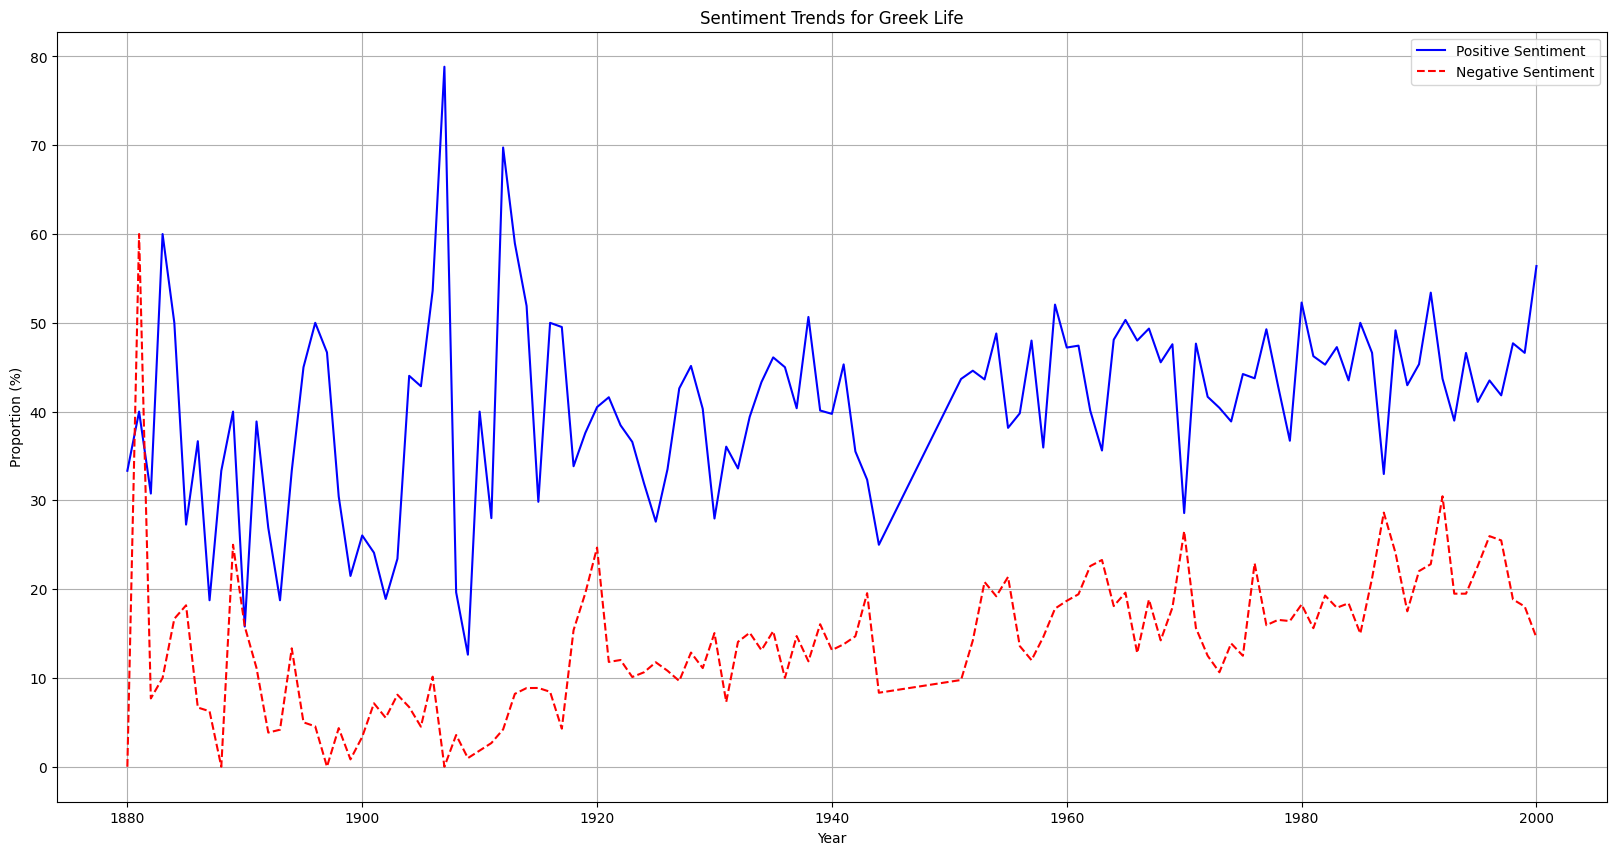

In [ ]:
plot_sentiment_trends(proportions_greek_life, title="Sentiment Trends for Greek Life", xlabel="Year", ylabel="Proportion (%)")

The sentiment analysis graph illustrates the trends in positive and negative sentiments associated with Greek life at Union College over time. The data reveals notable fluctuations in public perception, reflecting the evolving role and influence of fraternities and sororities on campus.

1880s to Early 1900s: Positive sentiment was predominant, reflecting the establishment and growth of fraternities and sororities during this period. Union College, known as the "Mother of Fraternities," saw the founding of several Greek organizations, contributing to a vibrant campus life.In the early 1800s there was an antimasonic sentiment in the United States. Though the antimasonic movement died out by the end of 1830 after the disappearance of Captain William Morgan, give this history, it's plausible that the resurgence of anti-secret society sentiments in the 1880s could have influenced perceptions and reporting on Greek life at Union College during that time.

Early 1900s to Mid 1900s: A decline in positive sentiment is observed, possibly due to societal changes and critiques of Greek life. The 1960s, in particular, were marked by student activism and a reevaluation of traditional campus institutions, including fraternities and sororities.

Late 20th Century (1970s-2000): A resurgence in positive sentiment occurs, indicating a revitalization of Greek life. This period saw efforts to reform and modernize Greek organizations, aligning them with contemporary student values and campus policies.



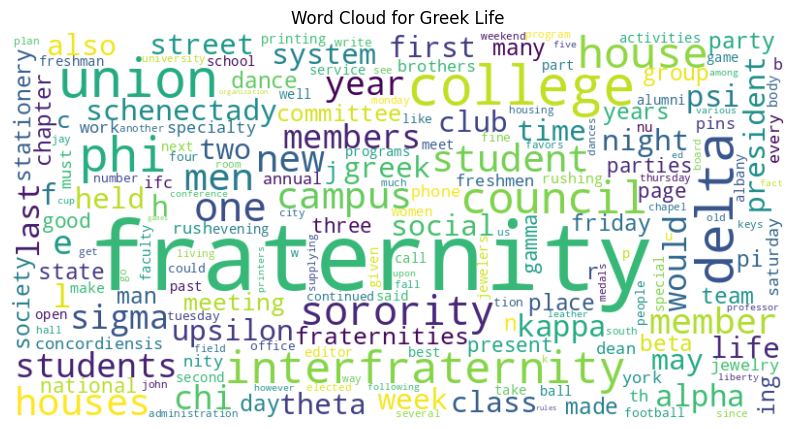

In [ ]:
generate_word_cloud_from_dict(greekLife_relevant_sentences_by_year, title="Word Cloud for Greek Life")

The word cloud highlights the prominence of "fraternity," underscoring its central role in Greek life discussions at Union College over 120 years. Terms like "campus," "college," and "members" emphasize Greek life’s integration into student life, while words such as "council," "interfraternity," and "meeting" reflect its organizational aspects. Social elements are evident in terms like "social," "houses," and "chapter," showcasing community and tradition. Specific names like "delta," "phi," and "alpha" indicate the frequent mentions of well-known fraternities and sororities, reflecting their influence on campus culture. Overall, the word cloud captures Greek life’s enduring social and structural significance.

In [ ]:
display_side_by_side_adjectives(top_adjectives_by_decade_greek_life)

Decade    1880                1890                1900                1910                1920                1930                1940                1950                1960                1970                1980                1990                2000                
Rank 1  upsilon (18)        frater- (41)        fine (107)          special (140)       new (168)           new (240)           last (70)           new (64)            new (127)           social (51)         greek (183)         greek (209)         greek (44)          
Rank 2  new (9)             n. (39)             east (106)          good (109)          last (110)          first (134)         new (65)            carl (59)           social (98)         new (48)            new (178)           social (102)        social (17)         
Rank 3  annual (7)          annual (28)         frater- (103)       new (83)            schenectady (102)   last (127)          first (54)          last (50)           last (86)           las

The top adjectives per decade reveal how the focus on Greek life at Union College evolved over time. In the earlier decades (1880–1920), adjectives like "upsilon," "annual," "new," and "fine" suggest a focus on the organizational and formal aspects of Greek life, such as founding chapters, annual events, and structural growth. Specific references to fraternity names like "upsilon" and "delta" indicate a strong emphasis on individual organizations during their formative years.

In the mid-20th century, adjectives like "social," "many," and "open" become more prominent, reflecting an increased focus on the communal and social aspects of Greek life. By the 1980s and beyond, the prominence of "Greek" and "social" suggests a more unified view of Greek organizations as an integral part of campus identity. This shift highlights how Greek life transitioned from being event-focused and exclusive to becoming more social and culturally significant on campus.


###Fraterntites:

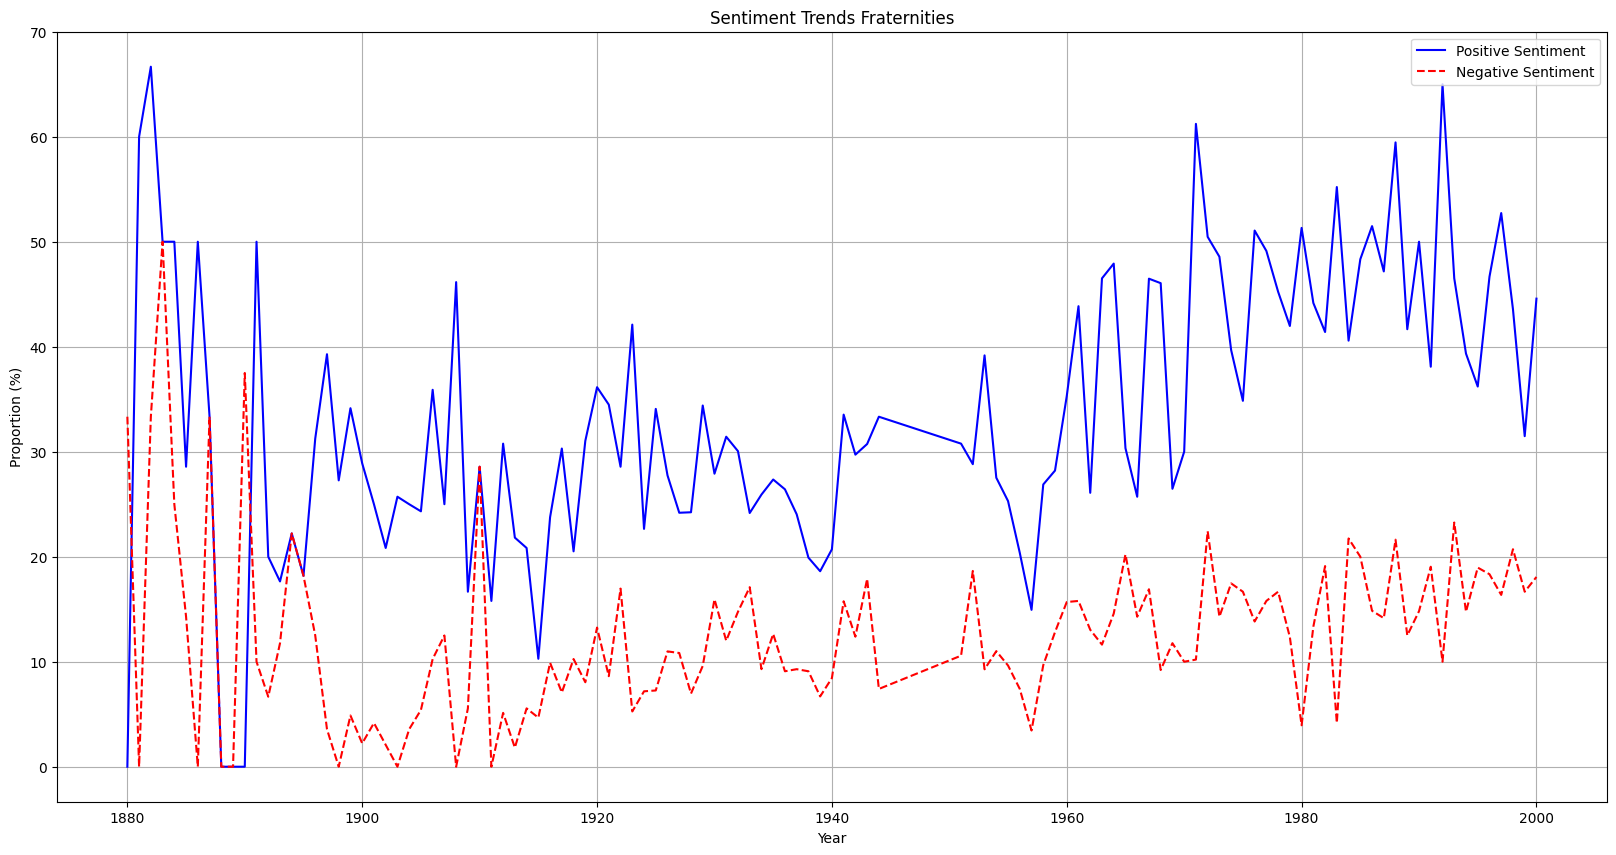

In [ ]:
plot_sentiment_trends(proportions_fraternity, title="Sentiment Trends Fraternities", xlabel="Year", ylabel="Proportion (%)")

The sentiment analysis graph for fraternities shows a prominent trend of predominantly positive sentiment throughout the period from 1880 to 2000, with notable fluctuations. Early on, there are sharp peaks and dips, indicating mixed perceptions during the formative years of Greek life at Union College. The positive sentiment rises steadily in the mid-20th century and stabilizes at a high level from the 1970s onward, suggesting a growing appreciation or normalization of fraternities on campus.

Conversely, negative sentiment remains consistently lower but exhibits some peaks, particularly around the 1920s, 1940s, and 1980s. These spikes might correlate with controversies, societal critiques of Greek life, or local events tied to specific fraternities. The divergence between positive and negative sentiments in later decades highlights a broader acceptance of fraternities while occasional criticisms persisted. This aligns with national trends in fraternity reform and their integration into campus culture during the late 20th century.

This was actually surprising in a sense as it is expected that usually such 'secret' socieites are looked upon with doubt and disdain, as there is a common thought amongst people that evil-doers hide in the shadows and have secrets.

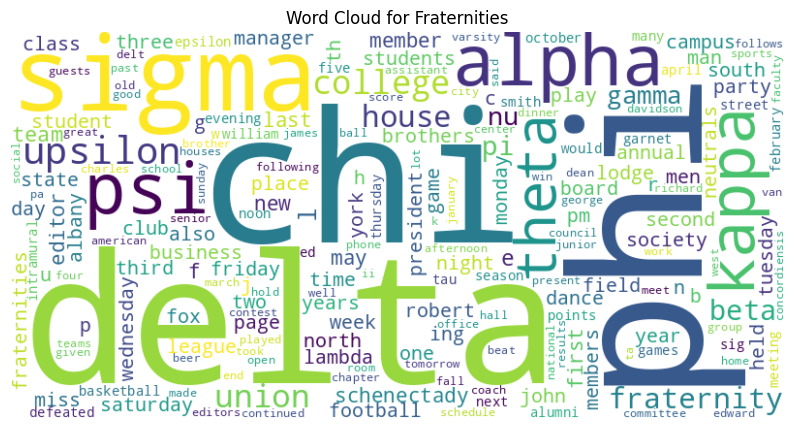

In [ ]:
generate_word_cloud_from_dict(fraternity_relevant_sentences_by_year, title="Word Cloud for Fraternities")

The word cloud highlights key themes and organizations. Prominent words like "phi," "delta," "sigma," "alpha," and "kappa" indicate frequent mentions of specific fraternities, reflecting their significant presence on campus. Terms like "college," "campus," and "house" underscore the central role fraternities play in campus life and housing. Additionally, words such as "brothers," "team," and "social" point to the communal and social aspects of fraternity life, while terms like "football," "league," and "sports" emphasize their involvement in athletics. Overall, the word cloud captures the multifaceted contributions of fraternities to Union College's student culture, including social events, academic engagement, and athletic participation.

In [ ]:
display_side_by_side_adjectives(top_adjectives_by_decade_fraternity)

Decade    1880                1890                1900                1910                1920                1930                1940                1950                1960                1970                1980                1990                2000                
Rank 1  alpha (8)           alpha (32)          last (41)           alpha (101)         chi (162)           delta (409)         delta (244)         delta (135)         chi (77)            chi (74)            chi (114)           chi (68)            chi (13)            
Rank 2  annual (7)          chi (27)            alpha (36)          delta (83)          delta (151)         alpha (364)         phi (235)           chi (89)            delta (62)          last (41)           delta (90)          west (57)           new (5)             
Rank 3  delta (3)           last (21)           chi (30)            literary (63)       alpha (145)         chi (362)           alpha (164)         phi (72)            phi (56)            del

The top 10 adjectives per decade for fraternities provide insight into how the perception and focus on fraternities at Union College evolved over time. In the earlier decades (1880s–1920s), adjectives such as "first," "new," and "fine" suggest an emphasis on establishing traditions, growth, and prestige within fraternities. This aligns with the expansion of Greek organizations during their formative years, where milestones like new chapters or annual events were central. The most used term during this period is "alpha" which could refer to either kappa alpha, or an alpha chapter of a fraternity.

By the mid-20th century (1940s–1970s), adjectives like "national" and "intramural". These terms indicate a broader campus focus on the social aspects of fraternity life, as well as possible discussions about making Greek life more accessible and national.

###Sororities:

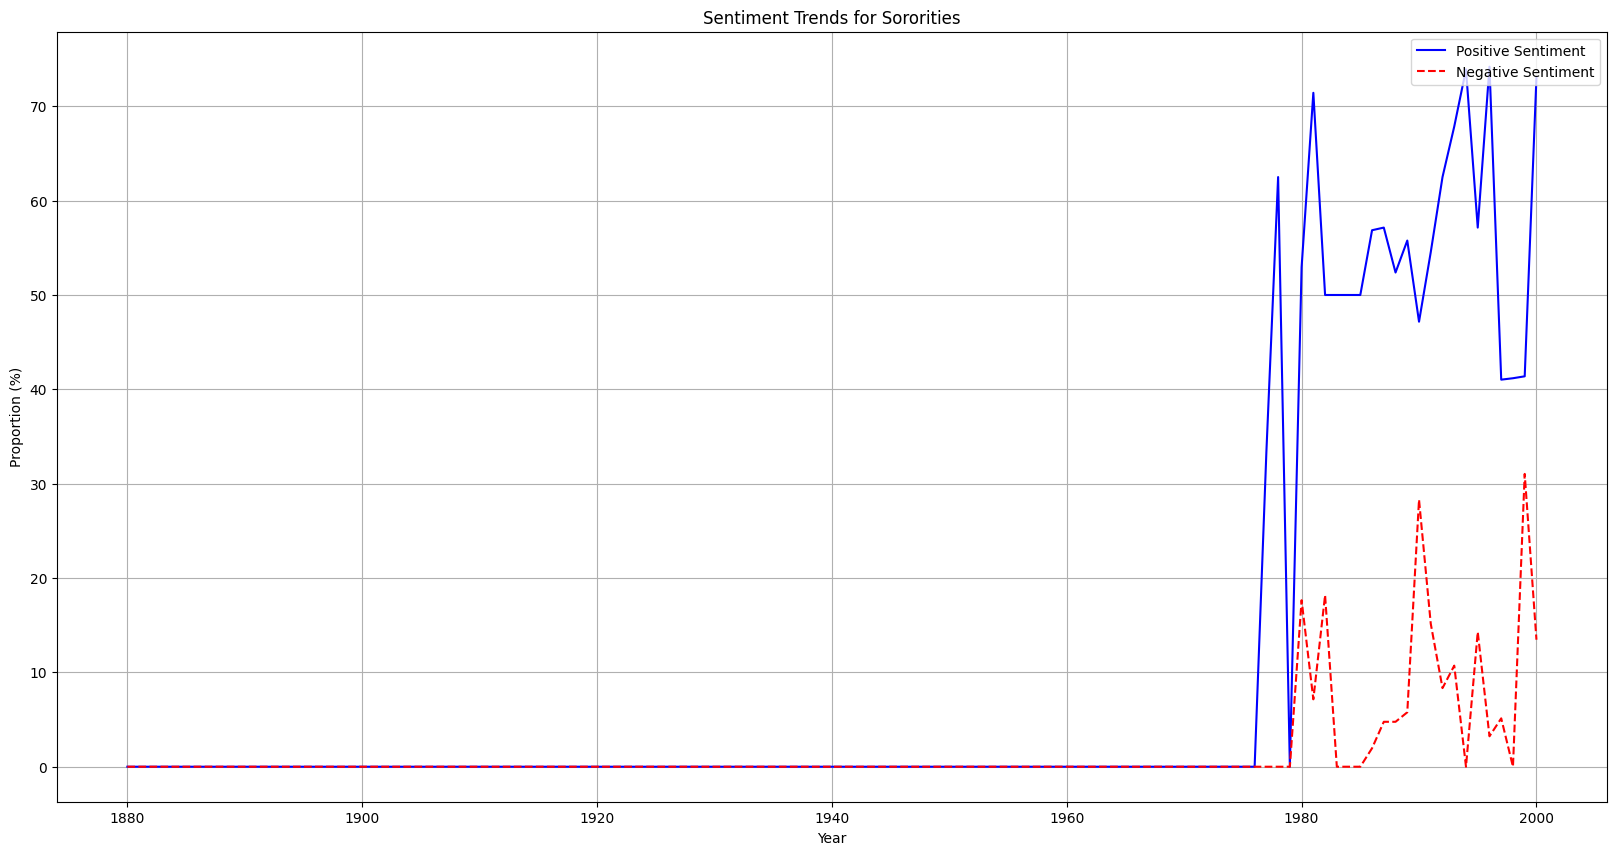

In [ ]:
plot_sentiment_trends(proportions_sorority, title="Sentiment Trends for Sororities", xlabel="Year", ylabel="Proportion (%)")

The sentiment analysis graph for sororities at Union College reveals a significant increase in discussions starting in the 1980s, with a predominantly positive sentiment. This trend aligns with the establishment of sororities on campus during that period. For instance, Delta Delta Delta was founded at Union in 1981, and Gamma Phi Beta followed in 1986. The positive sentiment suggests that these organizations were well-received and became integral to campus life.
This is expected as women were allowed to attend union college in 1970 fall, and the first sorority was created on campus around 1977.

While there are occasional peaks in negative sentiment, they are less pronounced than the positive trends. These fluctuations may correspond to isolated incidents or just slow acceptance of women and sororities on campus.


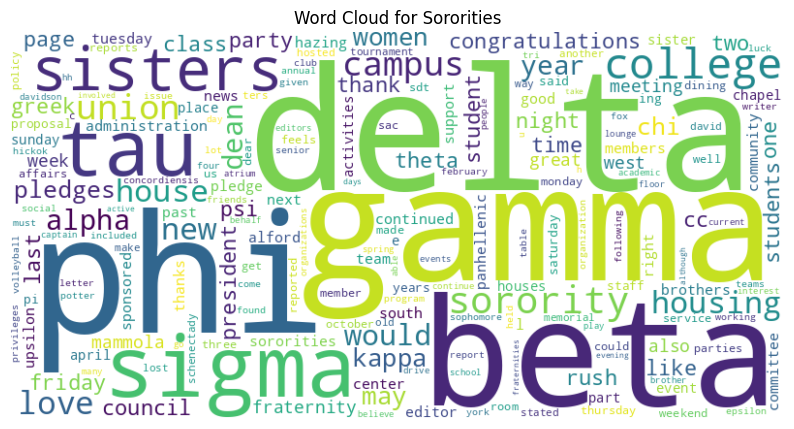

In [ ]:
generate_word_cloud_from_dict(sorority_relevant_sentences_by_year, title="Word Cloud for Sororities")

The word cloud for sororities at Union College highlights prominent terms that showcase their key role and activities on campus. Central words like "sorority," "sisters," and "women" emphasize the community and gendered identity that sororities represent. Specific names like "gamma," "beta," and "delta" point to the most frequently mentioned organizations, reflecting their prominence and influence within the Greek system.

Other terms such as "love," "house," "pledges," and "housing" indicate the social and residential aspects of sorority life, while words like "panhellenic," "meeting," and "committee" emphasize their organizational structure and leadership roles. Positive terms like "thank," "great," and "congratulations" suggest an overwhelmingly supportive narrative around sororities, reinforcing their valued presence on campus. Overall, the word cloud illustrates that sororities are deeply embedded in the social, organizational, and community fabric of Union College.

In [ ]:
display_side_by_side_adjectives(top_adjectives_by_decade_sorority)

Decade    1880                1890                1900                1910                1920                1930                1940                1950                1960                1970                1980                1990                2000                
Rank 1                                                                                                                                                                  delta (1)           delta (4)           delta (39)          delta (44)          dean (7)            
Rank 2                                                                                                                                                                  pl (1)              sigma (2)           new (25)            new (32)            sigma (5)           
Rank 3                                                                                                                                                                                      eil

The analysis of the top 10 adjectives per decade for sororities at Union College highlights significant historical and cultural trends. Notably, there is no data for sororities before 1960, which aligns with the historical context, as Union College was an all-male institution until 1970. The absence of women during this time explains the lack of mentions or relevance of sororities in earlier decades.

Following the induction of women and the establishment of sororities in 1977, there is a noticeable shift in language. Terms like "interested" and "delta" from the late 1970s and early 1980s suggest the formative stages of Delta Phi Epsilon, one of the first sororities on campus. As time progresses, adjectives like "new," "great," and "sigma" highlight the growing presence and contributions of sororities. By the later decades, words such as "dean," "panhellenic," and "greek" emphasize the organizational structure and increasing influence of sororities within Union College's campus culture. This progression reflects the integration and growing importance of sororities in fostering community and leadership among women at the college.

###Exploring Sentiment Trends for Individual Fraternities and Sororities:

In this section, the analysis focuses on the sentiment trends for individual fraternities and sororities. The top 10 adjectives per decade analysis has been omitted, as previous results indicated that it provided limited additional insights into the overall sentiment or context for specific organizations. Instead, the emphasis is placed on understanding the sentiment dynamics through visualizations and narrative analysis for each fraternity and sorority.

###Alpha Delta Phi

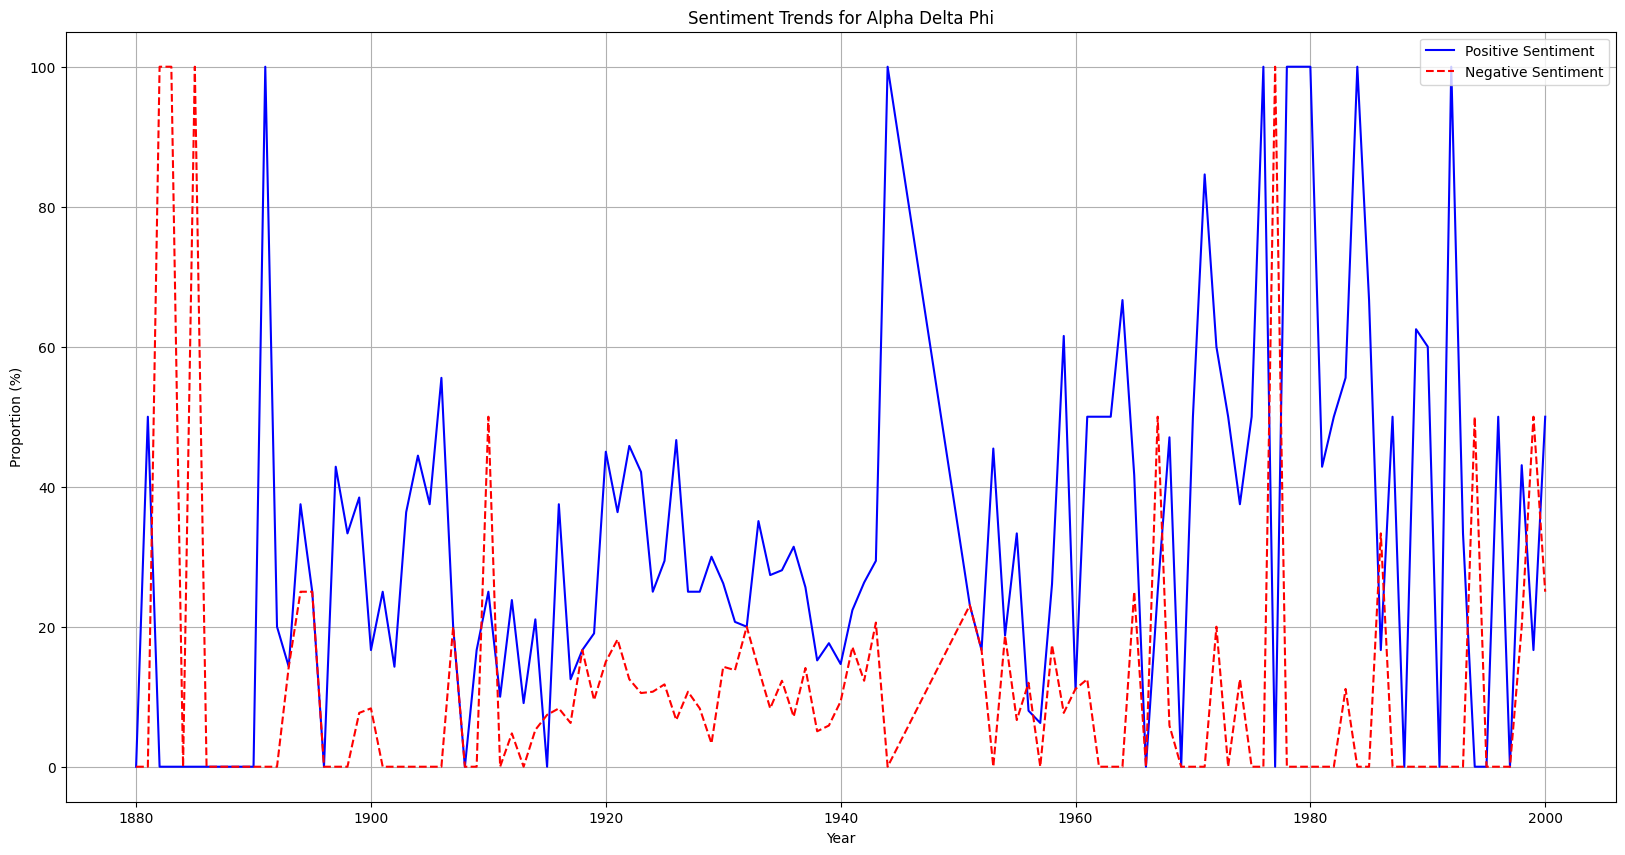

In [ ]:
plot_sentiment_trends(proportions_adp, title="Sentiment Trends for Alpha Delta Phi", xlabel="Year", ylabel="Proportion (%)")

The sentiment analysis graph for Alpha Delta Phi fraternity at Union College reflects the organization's dynamic history on campus. Established in 1859, Alpha Delta Phi has been integral to Union's Greek life.

In the late 19th century, the fraternity constructed a notable chapter house on Library Lane, which became a central hub for members and a distinctive feature of the campus. This period likely contributed to the positive sentiment observed in the analysis.

The mid-20th century saw Alpha Delta Phi actively participating in campus events and fostering a strong brotherhood, aligning with peaks in positive sentiment. However, the 1980s presented challenges, including administrative decisions and housing changes, which may have influenced the negative sentiment spikes during that era.

Overall, the sentiment trends mirror Alpha Delta Phi's evolving role at Union College, highlighting its contributions and the obstacles it has faced over time.

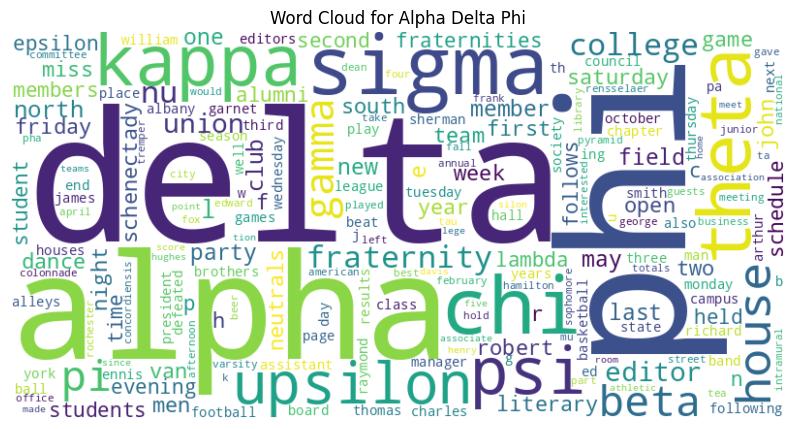

In [ ]:
generate_word_cloud_from_dict(adp_relevant_sentences_by_year, title="Word Cloud for Alpha Delta Phi")

The word cloud for Alpha Delta Phi at Union College highlights the fraternity's prominent role in campus life over the decades. Central terms like "delta," "alpha," "psi," and "chapter" emphasize the fraternity's identity and organizational structure. Words like "house," "students," "members," and "union" point to its strong social and residential presence on campus. Additionally, terms such as "literary," "alumni," and "council" reflect the intellectual and leadership contributions of the fraternity, aligning with Alpha Delta Phi's historical focus on fostering both academic and social engagement.

###Sigma Phi

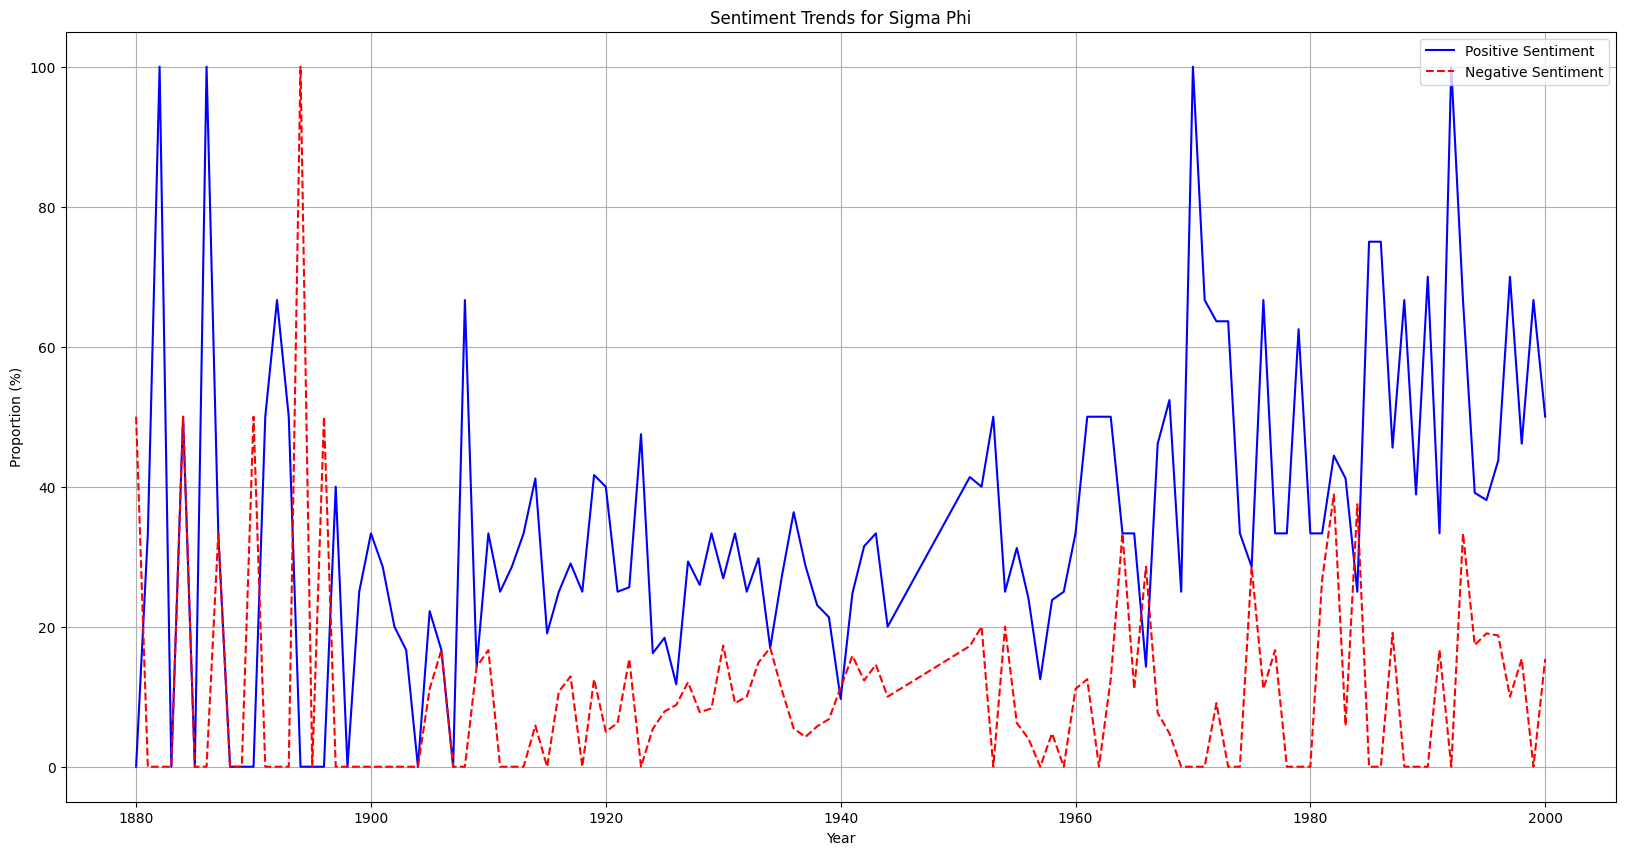

In [ ]:
plot_sentiment_trends(proportions_sigphi, title="Sentiment Trends for Sigma Phi", xlabel="Year", ylabel="Proportion (%)")

he sentiment analysis for Sigma Phi fraternity at Union College reflects its significant and evolving presence on campus since its founding in 1827. As one of the oldest fraternities in the nation, Sigma Phi has been integral to Union's Greek life, contributing to both its traditions and controversies.

In the late 19th century, the fraternity's prominence likely led to heightened public attention, resulting in notable fluctuations in sentiment. The construction of Sigma Phi Place in 1905, a longstanding chapter house, may have contributed to positive perceptions during that era.

Throughout the 20th century, periods of positive sentiment correspond with the fraternity's active engagement in campus activities and community service. However, intermittent spikes in negative sentiment, particularly in the 1940s and later decades. There is a dip in sentiment during WW2, as during this time, the brothers of sigma phi went to fight in the war, and several lost their lives. These trends underscore Sigma Phi's enduring influence at Union College, marked by both commendable contributions and challenges inherent to longstanding institutions.

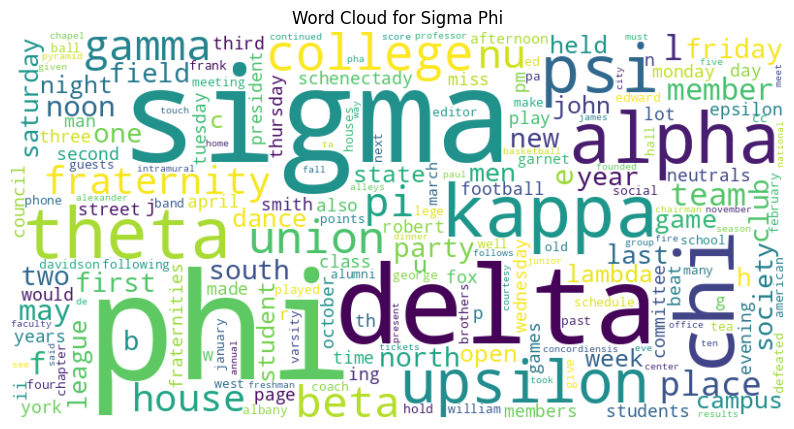

In [ ]:
generate_word_cloud_from_dict(sigphi_relevant_sentences_by_year, title="Word Cloud for Sigma Phi")

The word cloud for Sigma Phi fraternity at Union College highlights prominent themes and terms associated with the organization over the years. Words such as “fraternity,” “college,” and “union” underscore its central role in campus life and traditions. Other terms like “house,” “members,” and “chapter” reflect the fraternity's organizational structure and the communal aspects of Greek life. The presence of words like “party,” “dance,” and “football” point to its social and athletic contributions to campus culture. Additionally, terms such as “neutral” and “council” suggest the fraternity's involvement in broader campus discussions, governance, or interfraternity relations. Overall, this word cloud encapsulates Sigma Phi’s multifaceted impact at Union College, from fostering community to shaping social and academic experiences.

###ChiPsi

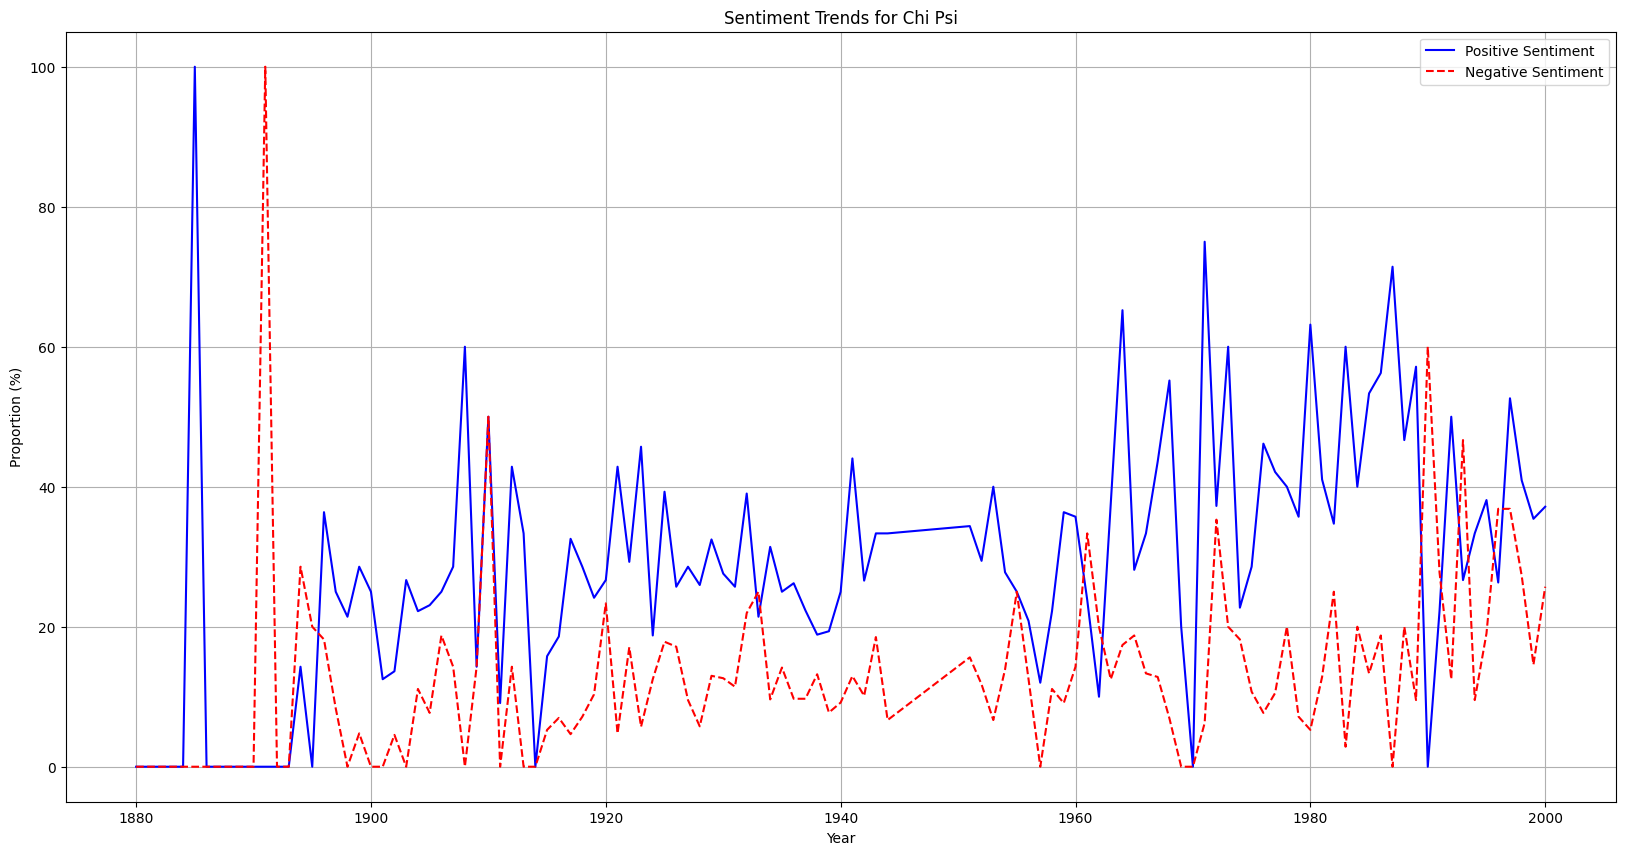

In [ ]:
plot_sentiment_trends(proportions_chipsi, title="Sentiment Trends for Chi Psi", xlabel="Year", ylabel="Proportion (%)")

The sentiment analysis for Chi Psi fraternity at Union College reveals a dynamic history marked by both commendations and challenges. Founded on May 20, 1841, at Union College, Chi Psi was the eighth Greek-letter society in the United States and the fifth to originate at Union. Notably, it was the first fraternity established upon the fraternal and social principles of brotherhood, rather than the literary interests emphasized by existing societies at the time.

In the late 19th century, the fraternity experienced significant variability in sentiment, with strong positive perceptions interspersed with negative spikes. This pattern suggests that Chi Psi was an active and prominent presence on campus during this period, potentially involved in notable events or controversies.

The 20th century shows a more balanced trend between positive and negative sentiments, though positive sentiment generally dominates. Peaks in positive sentiment during the mid-20th century could correspond to key fraternity achievements, social contributions, or anniversaries. Conversely, visible spikes in negative sentiment, especially in the 1940s and later decades, may align with broader criticisms of Greek life, such as debates about exclusivity, hazing, or changing societal expectations of fraternities.

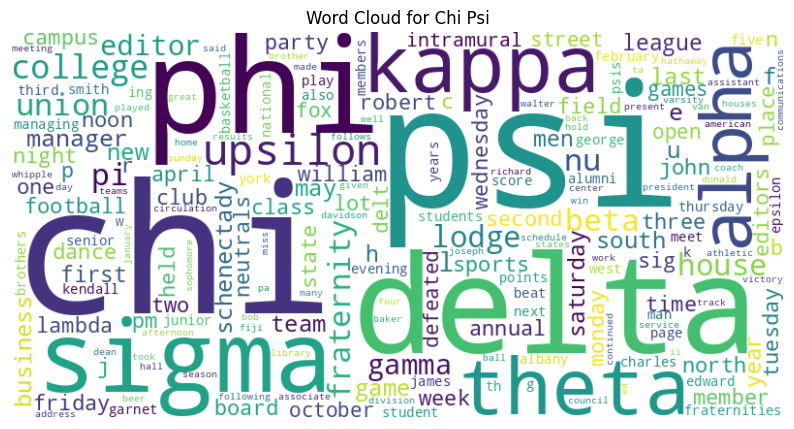

In [ ]:
generate_word_cloud_from_dict(chipsi_relevant_sentences_by_year, title="Word Cloud for Chi Psi")

The word cloud for Chi Psi fraternity at Union College reflects its diverse involvement in campus life over the years. Prominent terms like "psi," "chi," "delta," and "lodge" emphasize the fraternity’s identity and organizational structure, with "lodge" specifically referencing their unique tradition of housing. Words like "union," "college," and "campus" highlight their active engagement within the broader college community. Additionally, terms such as "sports," "football," and "league" suggest the fraternity’s involvement in athletic and competitive events, further underlining its multifaceted presence on campus.

###Kappa Alpha

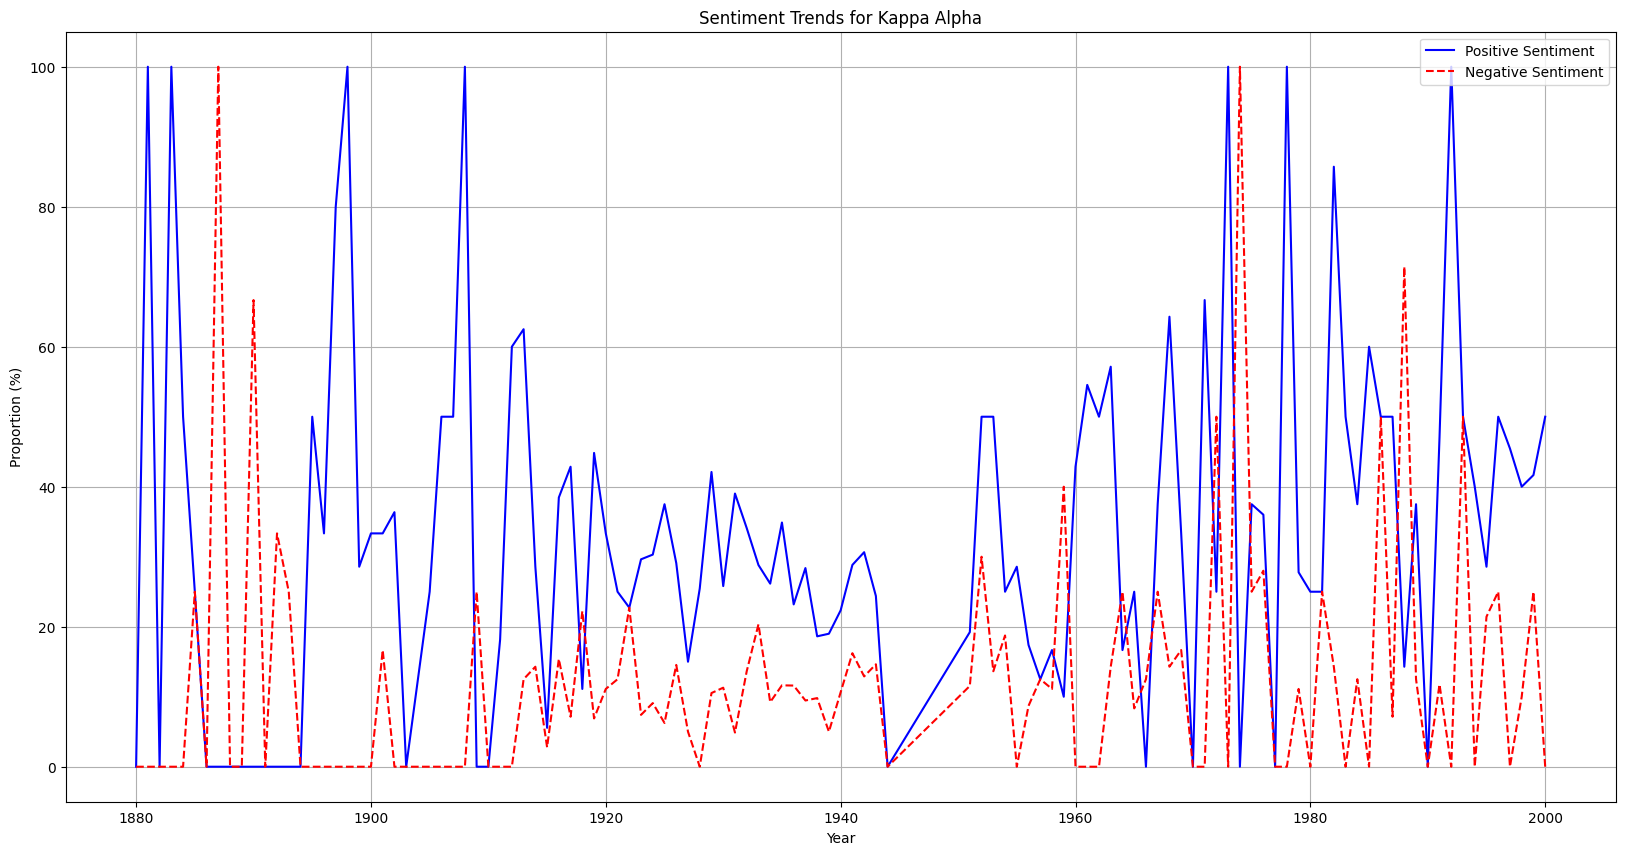

In [ ]:
plot_sentiment_trends(proportions_kappaalpha, title="Sentiment Trends for Kappa Alpha", xlabel="Year", ylabel="Proportion (%)")

The sentiment analysis for Kappa Alpha at Union College reflects its significant and evolving role on campus since its founding in 1825. As the first Greek-letter social fraternity in North America, Kappa Alpha established a new paradigm in collegiate social organizations.

In the late 19th century, the fraternity's prominence likely led to heightened public attention, resulting in notable fluctuations in sentiment. The construction of Sigma Phi Place in 1905, a longstanding chapter house, may have contributed to positive perceptions during that era.

Throughout the 20th century, periods of positive sentiment correspond with the fraternity's active engagement in campus activities and community service. However, intermittent spikes in negative sentiment, particularly in the 1940s and later decades, may reflect broader societal critiques of fraternity culture, including issues of exclusivity and misconduct.

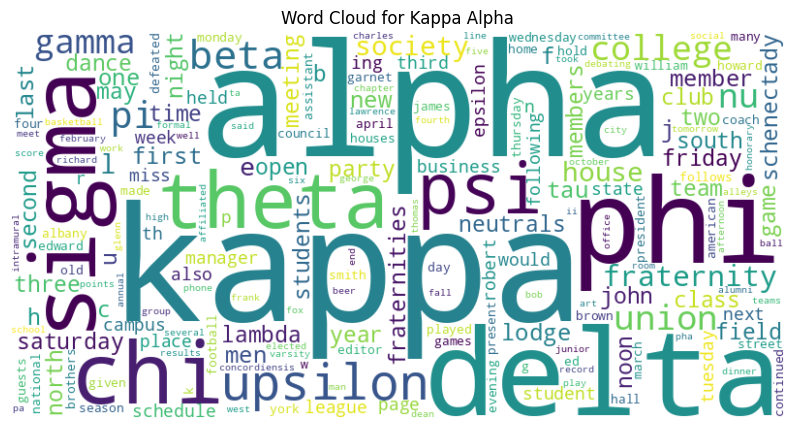

In [ ]:
generate_word_cloud_from_dict(kappaalpha_relevant_sentences_by_year, title="Word Cloud for Kappa Alpha")

The word cloud for Kappa Alpha fraternity at Union College emphasizes its central identity with terms like "kappa," "alpha," and "phi," while highlighting its integration into campus life through words like "union," "campus," and "college." Terms like "brothers" and "members" underscore its focus on fraternity bonds. Overall, the word cloud showcases Kappa Alpha's strong presence and active participation in Union College's Greek and campus culture.

###Sigma Chi

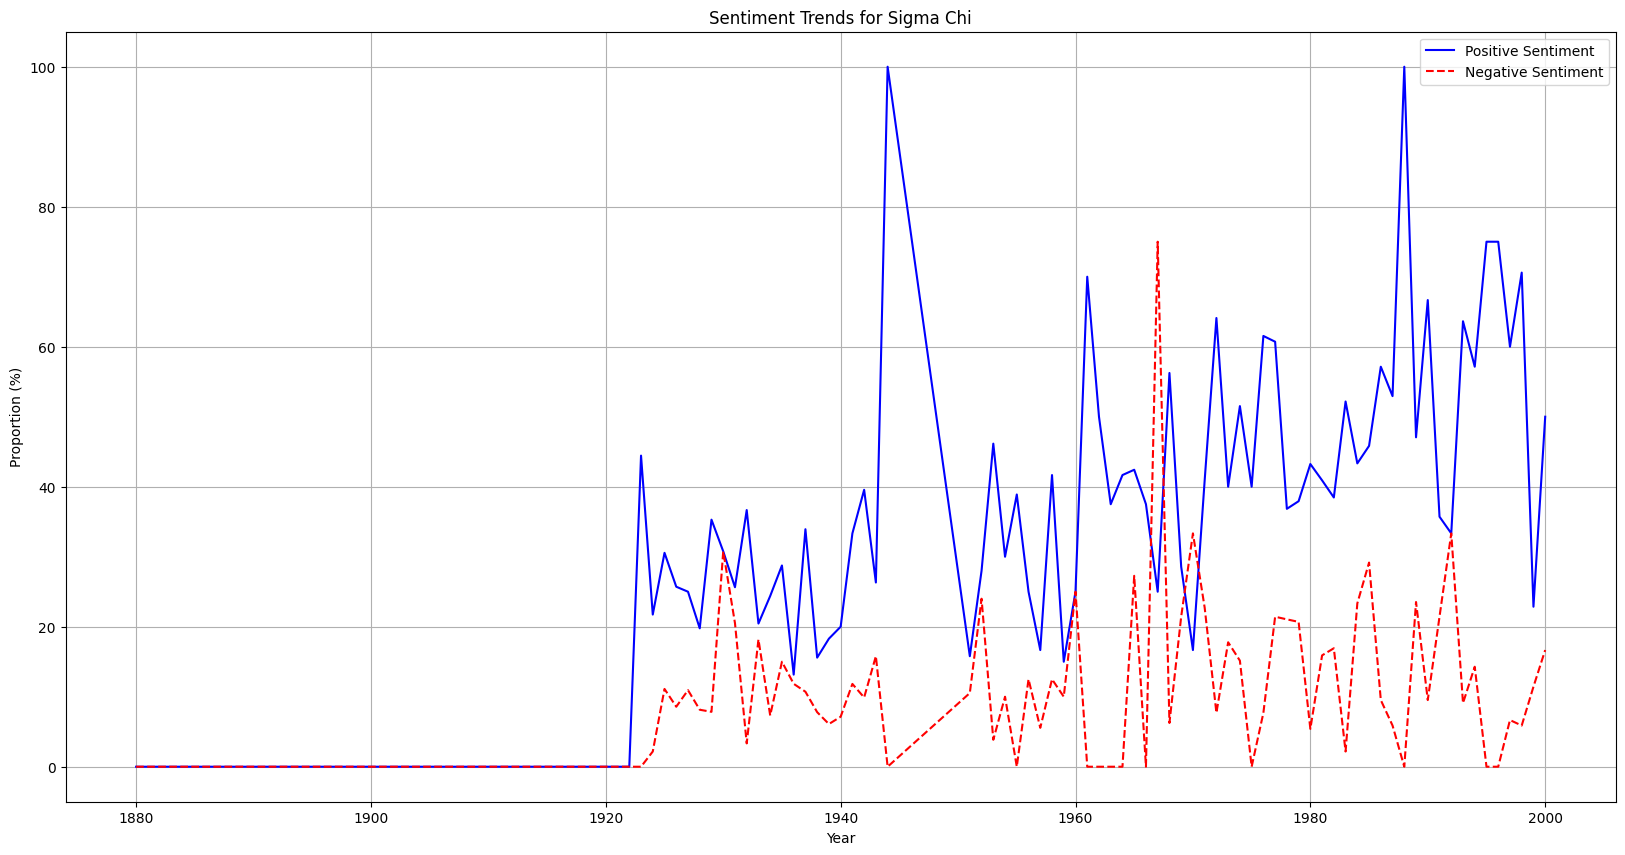

In [ ]:
plot_sentiment_trends(proportions_sigchi, title="Sentiment Trends for Sigma Chi", xlabel="Year", ylabel="Proportion (%)")

The sentiment analysis for Sigma Chi fraternity at Union College reflects its evolving presence on campus since the establishment of the Gamma Zeta Chapter in 1923. The absence of sentiment data before the 20th century aligns with this timeline, as the fraternity was not active at Union prior to that period.

In the mid-20th century, the fraternity experienced a steady rise in positive sentiment, with significant peaks during the 1940s and later in the 1980s. This trend suggests that Sigma Chi played an increasingly prominent and constructive role in campus activities, contributing positively to Union College’s Greek life.

However, the graph also showcases periodic spikes in negative sentiment, particularly in the 1960s and 1970s. These fluctuations could be linked to societal shifts in attitudes toward Greek life or specific controversies surrounding the fraternity during those decades. The consistent dominance of positive sentiment, however, indicates that Sigma Chi was generally well-regarded and impactful. Overall, the analysis underscores Sigma Chi's growing influence on Union College’s campus culture, while also reflecting the broader challenges faced by fraternities in navigating societal changes.

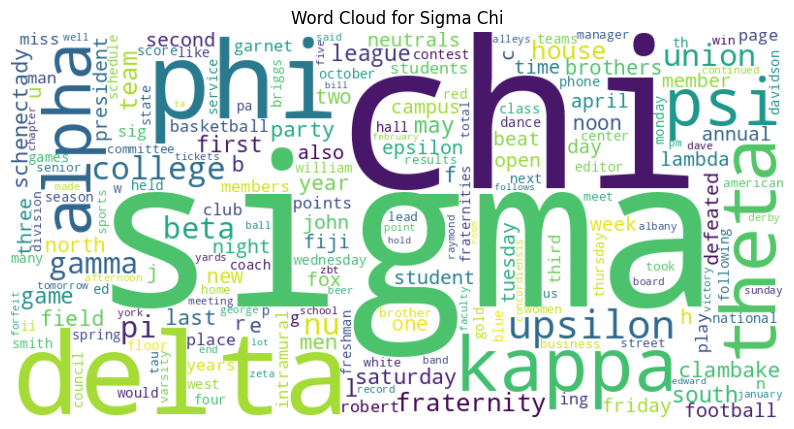

In [ ]:
generate_word_cloud_from_dict(sigchi_relevant_sentences_by_year, title="Word Cloud for Sigma Chi")

The word cloud for Sigma Chi fraternity at Union College highlights its significant presence in campus life. Prominent terms like "delta," "chi," and "sigma" underscore its central role, while mentions of "house," "union," and "fraternity" reflect its integration into the social and organizational framework of the college. Words like "game," "field," and "team" suggest active involvement in sports and intramural activities, aligning with fraternity traditions. Additionally, terms like "brothers" and "student" emphasize the community and brotherhood cultivated within Sigma Chi at Union.

###Theta Delta Chi

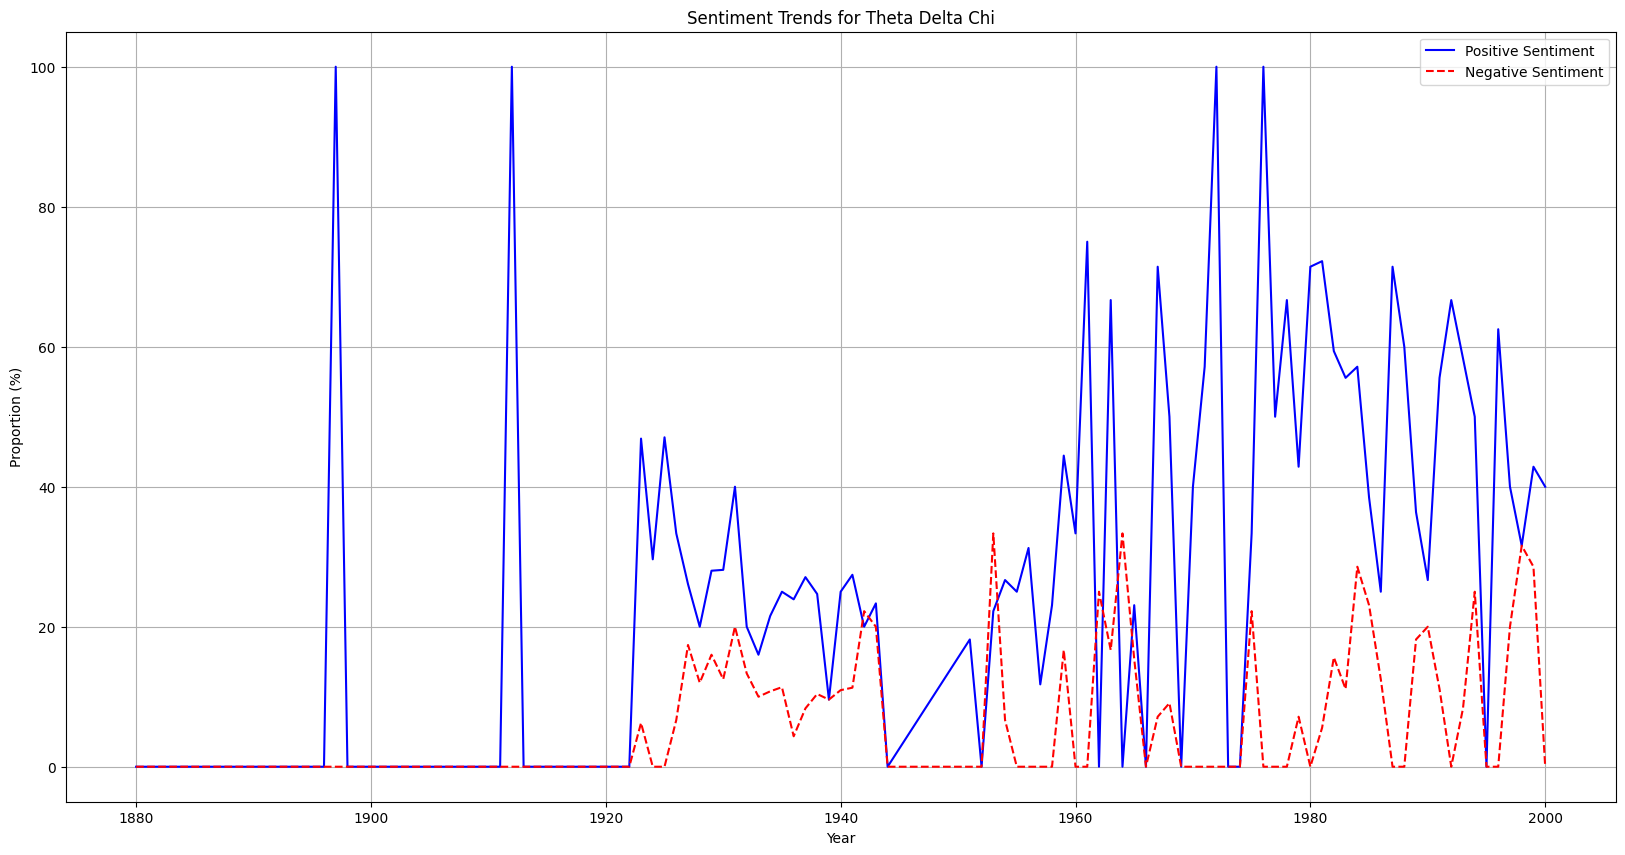

In [ ]:
plot_sentiment_trends(proportions_thetadeltachi, title="Sentiment Trends for Theta Delta Chi", xlabel="Year", ylabel="Proportion (%)")

The sentiment analysis graph for Theta Delta Chi at Union College illustrates the fraternity's evolving presence and perception on campus since its founding in 1847.
 The limited sentiment data before 1900 may reflect the fraternity's initial stages of establishment and lower visibility during its formative years.

By the mid-20th century, a noticeable rise in positive sentiment aligns with Theta Delta Chi's increased engagement in campus activities and contributions to student life. This period likely corresponds to the fraternity's efforts to expand its influence and foster a stronger community presence.

However, intermittent spikes in negative sentiment, particularly after the 1940s, suggest that the fraternity faced challenges or controversies during these times. These fluctuations may mirror broader societal critiques of Greek life, including issues related to exclusivity, hazing, or changing cultural expectations.

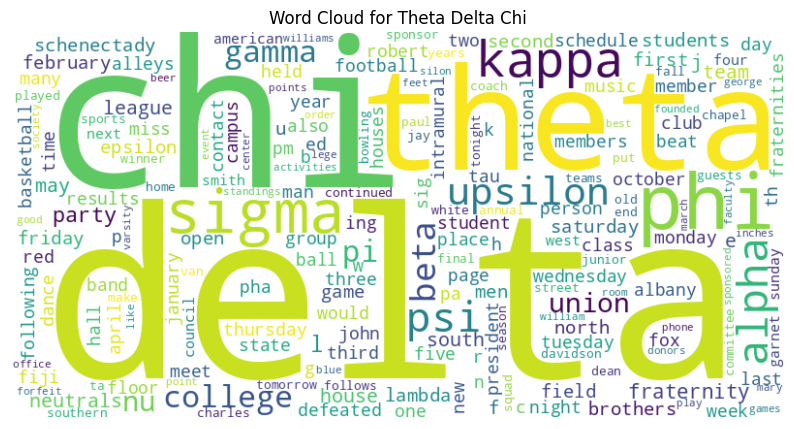

In [ ]:
generate_word_cloud_from_dict(thetadeltachi_relevant_sentences_by_year, title="Word Cloud for Theta Delta Chi")

The word cloud for Theta Delta Chi fraternity at Union College highlights the fraternity's significant associations with campus life over the years. Prominent words like "delta," "theta," and "chi" reflect the fraternity's strong branding and recognition within the community. Terms such as "union," "college," and "students" emphasize its central role in campus culture and student interactions. Words like "brothers," "house," and "party" suggest a focus on fostering camaraderie, social events, and a shared living experience, while mentions of "upsilon" probably refer to it being the epsilon chapter.

###Gamma Phi Beta

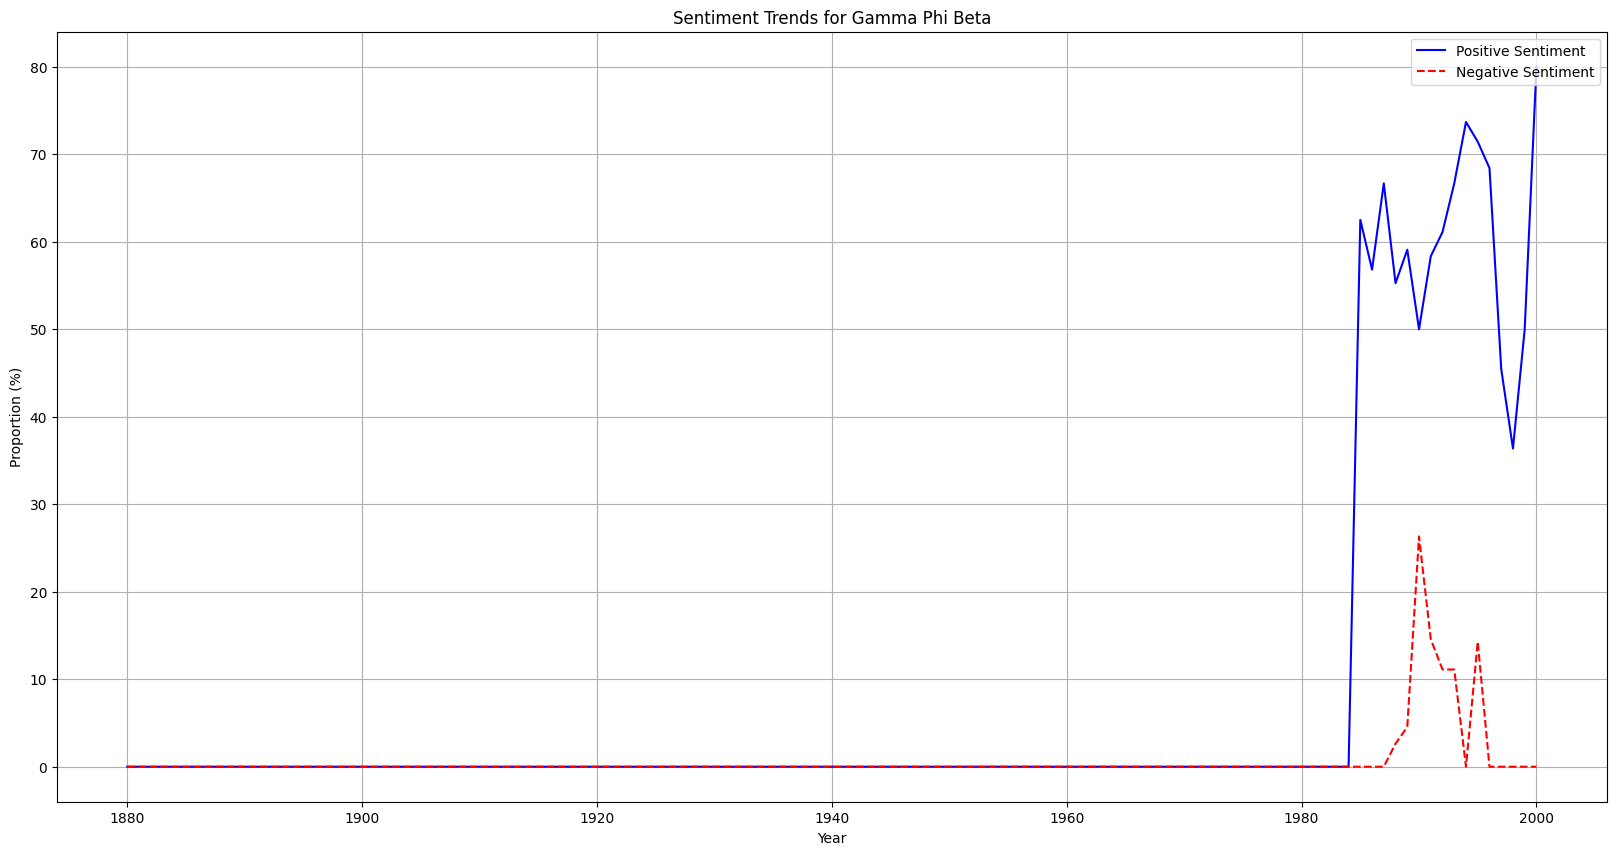

In [ ]:
plot_sentiment_trends(proportions_gphi, title="Sentiment Trends for Gamma Phi Beta", xlabel="Year", ylabel="Proportion (%)")

The sentiment analysis graph for Gamma Phi Beta at Union College illustrates a distinct emergence in sentiment trends starting around the 1980s. This late appearance reflects the introduction of sororities to Union College, with Gamma Phi Beta being one of the key organizations representing this shift. The Epsilon Epsilon Chapter of Gamma Phi Beta was installed on the Union College campus in May of 1986, marking a significant milestone in the college's history.

The graph highlights a sharp rise in positive sentiment during the late 20th century, showcasing the sorority's growing influence and acceptance within the campus community. This positive trend likely correlates with its efforts to provide a supportive environment for women, engage in campus activities, and uphold values of sisterhood and service. The Epsilon chapter at Union College works towards accomplishing these objectives in all aspects of life.

While positive sentiment dominates, there are occasional spikes in negative sentiment, particularly in the 1990s. These may correspond to broader critiques of Greek life or isolated incidents that attracted criticism. However, the overall trend demonstrates that Gamma Phi Beta was largely perceived in a favorable light, reflecting its meaningful contributions to the evolving Greek life and broader campus culture at Union College. The increasing prominence of positive sentiment underscores the significant role Gamma Phi Beta played in shaping a more inclusive social landscape during this period.

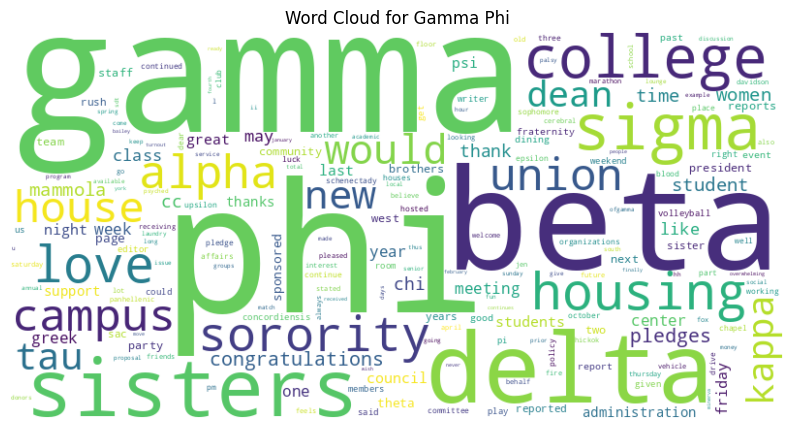

In [ ]:
generate_word_cloud_from_dict(gammaphibeta_relevant_sentences_by_year, title="Word Cloud for Gamma Phi")

The word cloud for Gamma Phi Beta at Union College highlights key themes and frequently mentioned terms associated with the sorority. Prominent words like "sisters," "sorority," and "love" emphasize the organization's focus on sisterhood and community, reflecting its supportive and inclusive environment. Other terms like "love," "thank you," and "congratulations" suggest  celebratory and appreciative aspects, indicating the sorority's contributions to events and achievements on campus, and the fact that concordiensis might be congratulating newly initiated sisters.

###Sigma Delta Tau

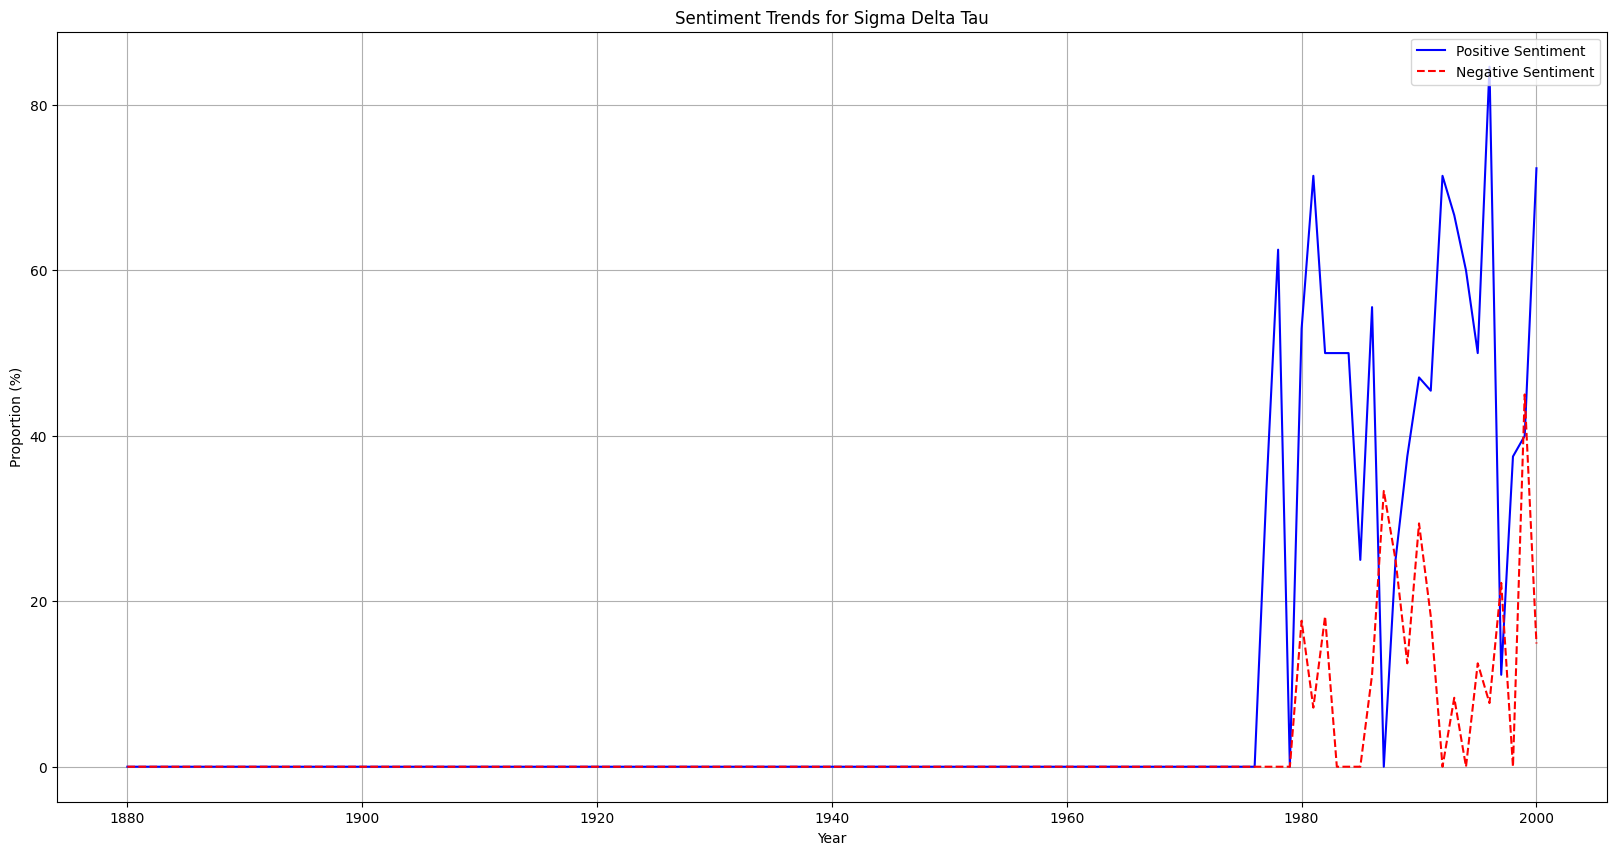

In [ ]:
plot_sentiment_trends(proportions_sdt, title="Sentiment Trends for Sigma Delta Tau", xlabel="Year", ylabel="Proportion (%)")

The sentiment analysis graph for Sigma Delta Tau at Union College reflects its emergence and growing role on campus starting in the late 20th century. The absence of sentiment data prior to this period aligns with the later establishment of sororities at Union College. Sigma Delta Tau was founded at Cornell University in 1917 and established its Beta Xi chapter at Union College on November 20, 1977, marking the introduction of sororities to the campus.

Positive sentiment for Sigma Delta Tau is dominant from the 1980s onwards, suggesting the organization’s success in fostering a supportive environment and contributing meaningfully to the Greek and campus communities. Peaks in positive sentiment indicate periods of heightened involvement, such as successful events, philanthropy, or campus initiatives championed by the sorority.

Despite the overwhelmingly positive trend, intermittent spikes in negative sentiment, especially in the 1990s, highlight challenges or critiques faced by the organization. These could be tied to broader cultural discussions about Greek life or specific incidents on campus. Nonetheless, the overall trajectory of Sigma Delta Tau emphasizes its constructive influence at Union College, reflecting the sorority's alignment with values of empowerment, service, and sisterhood as it became a vital part of the campus culture.

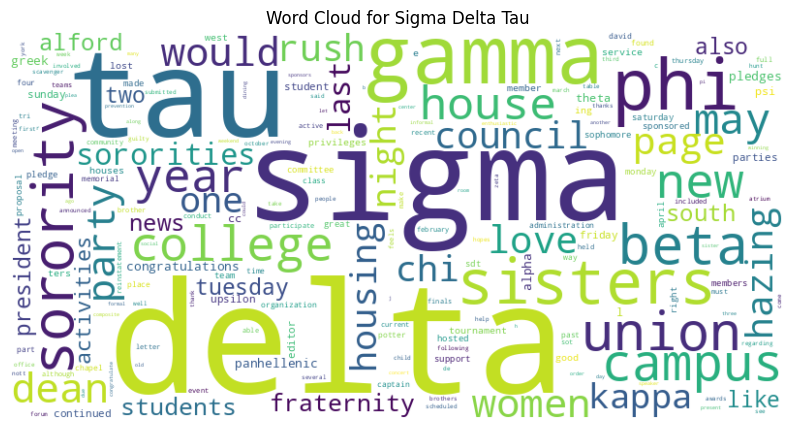

In [ ]:
generate_word_cloud_from_dict(sigdelatau_relevant_sentences_by_year, title="Word Cloud for Sigma Delta Tau")

The word cloud for Sigma Delta Tau at Union College highlights key themes and values associated with the sorority. Prominent words like "sisters," "sorority," and "love" emphasize the organization's focus on sisterhood, community, and supportive relationships among members. The appearance of terms such as "philanthropy," "housing," and "campus" reflects Sigma Delta Tau's active involvement in campus life and charitable initiatives. Words like "hazing" and "pledges," while less frequent, indicate discussions around recruitment and broader conversations about Greek life challenges and reforms. Overall, the word cloud captures Sigma Delta Tau's multifaceted role at Union College, balancing tradition, service, and social engagement.

__________________________________________________________________________________________
##Conlcusion
__________________________________________________________________________________________


This analysis of over a century of sentiment and language trends related to Greek Life at Union College provides a profound understanding of its evolving role and perception on campus. By delving into the Concordiensis dataset, we have uncovered how fraternities and sororities have shaped and been shaped by Union’s campus culture, navigating societal changes, institutional dynamics, and shifting student values.

The findings reveal the significant influence of Greek Life on fostering a sense of community, leadership, and tradition among students. Fraternities such as Sigma Phi and Kappa Alpha, with their deep-rooted histories, exemplify how Union College, as the "Mother of Fraternities," played a pivotal role in the development of Greek life nationally. Meanwhile, the establishment of sororities like Gamma Phi Beta and Sigma Delta Tau reflects the college's progression toward inclusivity and gender representation, reinforcing its commitment to evolving with the times.

Although positive sentiment has largely prevailed, highlighting the enriching contributions of Greek organizations, occasional spikes in negative sentiment underscore the challenges these groups have faced. From societal critiques of exclusivity to specific incidents on campus, these fluctuations remind us of the ongoing need for Greek organizations to adapt and align with the college’s values of inclusion and integrity. The late 20th-century emergence of sororities and a broader acceptance of Greek Life signify Union's capacity to embrace change while honoring its historic roots.

Through sentiment analysis, word clouds, and language trends, this project captures a nuanced narrative of how Greek Life has influenced Union College’s identity. The dataset reveals not only a history of celebration and community but also moments of reflection and reform that have strengthened the institution’s resilience. Ultimately, the enduring presence and adaptability of Greek Life at Union reflect Union College's ability to balance tradition with progress, ensuring its campus culture remains vibrant, inclusive, and reflective of the broader societal landscape.

##THANK YOU!